# 01 module

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import logging
import scanpy as sc

In [ ]:
from scipy.stats import median_abs_deviation

In [ ]:
import rpy2.rinterface_lib.callbacks
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)
%load_ext rpy2.ipython

In [ ]:
%%R
.libPaths(c("/public/home/liuzj/softwares/anaconda3/envs/R/lib/R/library/","/public/home/qinyw/R/x86_64-conda-linux-gnu-library/4.1"))
.libPaths()

[1] "/public1/software/liuzj/softwares/anaconda3/envs/R/lib/R/library"
[2] "/public/home/qinyw/R/x86_64-conda-linux-gnu-library/4.1"         
[3] "/public/home/qinyw/software/miniconda3/envs/sc_r/lib/R/library"  


In [ ]:
from jpy_tools import rTools
from jpy_tools import singleCellTools

<Figure size 72x72 with 0 Axes>

In [ ]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
import matplotlib as mpl
import matplotlib.patches as mp

In [ ]:
from matplotlib.pyplot import rc_context

In [ ]:
font_dirs = ["/public/home/mowp/test/fonts/"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
    
plt.rcParams["font.family"] = "Arial"
plt.rcParams['font.size'] = 12
plt.rcParams['svg.fonttype'] = 'none'

In [ ]:
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
import marsilea as ma
import marsilea.plotter as mp
# plt.rcParams['figure.dpi'] = 150
font_dirs = ["/public/home/mowp/test/fonts/"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.rcParams["font.family"] = "Arial"
sns.despine(top=True, right=True)
from itertools import product
from functools import reduce
import patchworklib as pw
from jpy_tools.otherTools import pwRecoverSeaborn, pwStack, F, pwShow
pw.show = pwShow
fc_recoverSns = pwRecoverSeaborn()
import seaborn.objects as so
from cycler import cycler
dt_snsStyle = {**sns.axes_style('ticks'), "legend.frameon": False, "axes.spines.top":False, "axes.spines.right":False, "axes.prop_cycle":cycler(color=['grey'])}
so.Plot.config.theme.update(dt_snsStyle)
from jpy_tools.soExt import Axhline, Axvline, mvLegToAx
plt.set_loglevel('Warning')

<Figure size 432x288 with 0 Axes>

In [ ]:
import adjustText

# 02 rank

In [ ]:
df

,CycID,R0,R1,R2,R3,R4,R5,R6,R7,R8,...,S15,V0,V1,V2,V3,V4,U0,U1,U2,counts
1,AT3G62550,10,10,10,10,10,12,10,10,10,...,10,12,10,10,12,10,12,12,10,40
2,AT3G26740,10,10,10,10,10,10,NaN,10,10,...,10,10,10,10,10,10,12,10,10,39
3,AT2G05070,4,4,4,4,4,4,2,4,NaN,...,4,4,4,4,4,2,2,4,2,37
4,AT2G43010,6,6,6,6,NaN,6,NaN,6,4,...,6,6,6,NaN,6,6,4,6,6,37
5,AT2G42530,10,12,12,12,10,12,NaN,10,NaN,...,10,10,12,NaN,10,12,12,12,10,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9828,AT1G01040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,1
9829,AT1G01020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,18,NaN,NaN,NaN,NaN,NaN,1
9830,AT5G66820,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9831,AT5G66270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
ls_gene = adata.var_names.tolist()
df_ad = sc.get.obs_df(adata,keys =[*ls_gene],layer = 'raw')
df_ad

,AT1G01010,AT1G01020,AT1G03987,AT1G01030,AT1G01040,AT1G03993,AT1G01046,AT1G01050,AT1G03997,AT1G01060,...,ATCG01220,ATCG01230,ATCG01240,ATCG01250,ATCG01260,ATCG01270,ATCG01280,ATCG01290,ATCG01300,ATCG01310
AAACCCAAGTCCCGAC-1-CT24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCCAAGTGATCGG-1-CT24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCCACAGGGACTA-1-CT24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCCAGTAAGATTG-1-CT24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCCATCATTACTC-1-CT24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTGGCGTAA-1-CT72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTTGGTGGTCCGT-1-CT72,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTTGGTGTTAGCT-1-CT72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTTGTCAAGTCGT-1-CT72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_ad

,AT1G01010,AT1G01020,AT1G03987,AT1G01030,AT1G01040,AT1G03993,AT1G01046,AT1G01050,AT1G03997,AT1G01060,...,ATCG01220,ATCG01230,ATCG01240,ATCG01250,ATCG01260,ATCG01270,ATCG01280,ATCG01290,ATCG01300,ATCG01310
AAACCCAAGTCCCGAC-1-CT24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCCAAGTGATCGG-1-CT24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCCACAGGGACTA-1-CT24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCCAGTAAGATTG-1-CT24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCCATCATTACTC-1-CT24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTGGCGTAA-1-CT72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTTGGTGGTCCGT-1-CT72,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTTGGTGTTAGCT-1-CT72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTTGTCAAGTCGT-1-CT72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_cpm = df_ad.sum(0).reset_index().copy()
df_cpm

,index,0
0,AT1G01010,2571.0
1,AT1G01020,8824.0
2,AT1G03987,3.0
3,AT1G01030,2294.0
4,AT1G01040,14930.0
...,...,...
32828,ATCG01270,0.0
32829,ATCG01280,11.0
32830,ATCG01290,0.0
32831,ATCG01300,12.0


In [ ]:
df_cpm.set_index('index',inplace=True)

In [ ]:
df_cpm.sum(axis = 0)

0    550130816.0
dtype: float32

In [ ]:
df_cpm = df_cpm.div(550130816.0,axis = 0)* 10**6
df_cpm

,0
index,
AT1G01010,4.673434
AT1G01020,16.039821
AT1G03987,0.005453
AT1G01030,4.169917
AT1G01040,27.139000
...,...
ATCG01270,0.000000
ATCG01280,0.019995
ATCG01290,0.000000


In [ ]:
df_cpm.reset_index(inplace=True)

In [ ]:
df_cpm.columns = ['CycID','CPM']
df_cpm

,CycID,CPM
0,AT1G01010,4.673434
1,AT1G01020,16.039821
2,AT1G03987,0.005453
3,AT1G01030,4.169917
4,AT1G01040,27.139000
...,...,...
32828,ATCG01270,0.000000
32829,ATCG01280,0.019995
32830,ATCG01290,0.000000
32831,ATCG01300,0.021813


In [ ]:
df

,CycID,R0,R1,R2,R3,R4,R5,R6,R7,R8,...,S15,V0,V1,V2,V3,V4,U0,U1,U2,counts
1,AT3G62550,10,10,10,10,10,12,10,10,10,...,10,12,10,10,12,10,12,12,10,40
2,AT3G26740,10,10,10,10,10,10,NaN,10,10,...,10,10,10,10,10,10,12,10,10,39
3,AT2G05070,4,4,4,4,4,4,2,4,NaN,...,4,4,4,4,4,2,2,4,2,37
4,AT2G43010,6,6,6,6,NaN,6,NaN,6,4,...,6,6,6,NaN,6,6,4,6,6,37
5,AT2G42530,10,12,12,12,10,12,NaN,10,NaN,...,10,10,12,NaN,10,12,12,12,10,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9828,AT1G01040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,1
9829,AT1G01020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,18,NaN,NaN,NaN,NaN,NaN,1
9830,AT5G66820,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9831,AT5G66270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
dt_clock = {'CCA1': 'AT2G46830',
 'LHY': 'AT1G01060',
 'PRR9': 'AT2G46790',
 'PRR7': 'AT5G02810',
 'RVE8': 'AT3G09600',
 'RVE6': 'AT5G52660',
 'RVE4': 'AT5G02840',
 'LNK1': 'AT5G64170',
 'LNK2': 'AT3G54500',
 'PRR5': 'AT5G24470',
 'PRR3': 'AT5G60100',
 'TOC1': 'AT5G61380',
 'GI': 'AT1G22770',
 #'BOA': 'AT5G59570',
 'LUX': 'AT3G46640',
 'ELF4': 'AT2G40080',
 'ELF3': 'AT2G25930',
 #'ZTL': 'AT5G57360',
 #'IPP2': 'AT3G02780',
 'LWD2':'AT3G26640'
 }

In [ ]:
df['CoreGene'] = df['CycID'].apply(lambda x:True if x in dt_clock.values () else False)

In [ ]:
df_all =  df.merge(df_cpm,on = 'CycID',how = 'inner')

In [ ]:
del df_all['Unnamed: 0']

In [ ]:
df_all

,CycID,R0,R1,R2,R3,R4,R5,R6,R7,R8,...,V1,V2,V3,V4,U0,U1,U2,counts,CoreGene,CPM
0,AT3G62550,10.0,10.0,10.0,10.0,10.0,12.0,10.0,10.0,10.0,...,10.0,10.0,12.0,10.0,12.0,12.0,10.0,40,False,112.716829
1,AT3G26740,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.0,10.0,...,10.0,10.0,10.0,10.0,12.0,10.0,10.0,39,False,364.331529
2,AT2G05070,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,NaN,...,4.0,4.0,4.0,2.0,2.0,4.0,2.0,37,False,1202.301355
3,AT2G43010,6.0,6.0,6.0,6.0,NaN,6.0,NaN,6.0,4.0,...,6.0,NaN,6.0,6.0,4.0,6.0,6.0,37,False,36.369533
4,AT2G42530,10.0,12.0,12.0,12.0,10.0,12.0,NaN,10.0,NaN,...,12.0,NaN,10.0,12.0,12.0,12.0,10.0,37,False,90.334877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9827,AT1G01040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,12.0,NaN,NaN,NaN,NaN,1,False,27.139000
9828,AT1G01020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,1,False,16.039821
9829,AT5G66820,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False,6.914719
9830,AT5G66270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False,2.484863


In [ ]:
df_all = pd.read_table('./03_Analysis/02_CountCPM/48-hour_allGene.txt')
df_clock = pd.read_table('./03_Analysis/02_CountCPM/48-hour_clockGene.txt')

In [ ]:
df_all

,CycID,R0,R1,R2,R3,R4,R5,R6,R7,R8,...,V1,V2,V3,V4,U0,U1,U2,counts,CoreGene,CPM
0,AT3G62550,10.0,10.0,10.0,10.0,10.0,12.0,10.0,10.0,10.0,...,10.0,10.0,12.0,10.0,12.0,12.0,10.0,40,False,112.716829
1,AT3G26740,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.0,10.0,...,10.0,10.0,10.0,10.0,12.0,10.0,10.0,39,False,364.331529
2,AT2G05070,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,NaN,...,4.0,4.0,4.0,2.0,2.0,4.0,2.0,37,False,1202.301355
3,AT2G43010,6.0,6.0,6.0,6.0,NaN,6.0,NaN,6.0,4.0,...,6.0,NaN,6.0,6.0,4.0,6.0,6.0,37,False,36.369533
4,AT2G42530,10.0,12.0,12.0,12.0,10.0,12.0,NaN,10.0,NaN,...,12.0,NaN,10.0,12.0,12.0,12.0,10.0,37,False,90.334877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9827,AT1G01040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,12.0,NaN,NaN,NaN,NaN,1,False,27.139000
9828,AT1G01020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,1,False,16.039821
9829,AT5G66820,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False,6.914719
9830,AT5G66270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False,2.484863


In [ ]:
dt_regulator = {
    'AT2G43010':'PIF4',
    'AT3G59060':'PIF5',
    'AT3G12320':'LNK3',
    'AT5G06980':'LNK4',
    'AT3G02380':'COL2',
    'AT2G21660':'GRP7',
    'AT3G20810':'JMJD5',
}

In [ ]:
df_all['regulator'] = df_all['CycID'].apply(lambda x:True if x in dt_regulator.keys() else False)

In [ ]:
df_all['ABF1'] = df_all['CycID'].apply(lambda x:True if x == 'AT1G49720' else False)

In [ ]:
df_all

,CycID,R0,R1,R2,R3,R4,R5,R6,R7,R8,...,V3,V4,U0,U1,U2,counts,CoreGene,CPM,regulator,ABF1
0,AT3G62550,10.0,10.0,10.0,10.0,10.0,12.0,10.0,10.0,10.0,...,12.0,10.0,12.0,12.0,10.0,40,False,112.716829,False,False
1,AT3G26740,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.0,10.0,...,10.0,10.0,12.0,10.0,10.0,39,False,364.331529,False,False
2,AT2G05070,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,NaN,...,4.0,2.0,2.0,4.0,2.0,37,False,1202.301355,False,False
3,AT2G43010,6.0,6.0,6.0,6.0,NaN,6.0,NaN,6.0,4.0,...,6.0,6.0,4.0,6.0,6.0,37,False,36.369533,True,False
4,AT2G42530,10.0,12.0,12.0,12.0,10.0,12.0,NaN,10.0,NaN,...,10.0,12.0,12.0,12.0,10.0,37,False,90.334877,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9827,AT1G01040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.0,NaN,NaN,NaN,NaN,1,False,27.139000,False,False
9828,AT1G01020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,False,16.039821,False,False
9829,AT5G66820,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,False,6.914719,False,False
9830,AT5G66270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,False,2.484863,False,False


In [ ]:
dt_coreGene = {'AT2G46830': 'CCA1',
 'AT1G01060': 'LHY',
 'AT2G46790': 'PRR9',
 'AT5G02810': 'PRR7',
 'AT3G09600': 'RVE8',
 'AT5G52660': 'RVE6',
 'AT5G02840': 'RVE4',
 'AT5G64170': 'LNK1',
 'AT3G54500': 'LNK2',
 'AT5G24470': 'PRR5',
 'AT5G60100': 'PRR3',
 'AT5G61380': 'TOC1',
 'AT1G22770': 'GI',
 'AT3G46640': 'LUX',
 'AT2G40080': 'ELF4',
 'AT2G25930': 'ELF3',
 'AT3G26640':'LWD2'}

In [ ]:
df_clock = df.loc[df['CoreGene'] == True]
df_clock['symble'] = df_clock['CycID'].map(dict(zip([v for v in dt_clock.values()],[v for v in dt_clock.keys()])))
df_clock

,CycID,R0,R1,R2,R3,R4,R5,R6,R7,R8,...,V1,V2,V3,V4,U0,U1,U2,counts,CoreGene,symble
13,AT3G54500,4,4,4,4,NaN,NaN,NaN,4,2,...,2,NaN,2,2,2,6,2,33,True,LNK2
36,AT5G02810,8,8,8,NaN,6,10,NaN,6,NaN,...,6,NaN,6,6,6,NaN,NaN,29,True,PRR7
47,AT2G46830,2,2,NaN,2,NaN,0,NaN,0,NaN,...,NaN,NaN,0,0,0,NaN,NaN,28,True,CCA1
49,AT1G01060,NaN,0,2,0,NaN,NaN,NaN,0,22,...,22,NaN,0,0,0,NaN,NaN,28,True,LHY
58,AT5G60100,14,14,12,NaN,NaN,NaN,NaN,NaN,NaN,...,12,NaN,12,12,12,NaN,NaN,26,True,PRR3
70,AT3G09600,0,NaN,NaN,22,NaN,NaN,NaN,0,22,...,NaN,NaN,22,22,22,NaN,22,25,True,RVE8
72,AT1G22770,10,10,10,NaN,NaN,NaN,NaN,12,8,...,NaN,NaN,8,10,10,NaN,NaN,25,True,GI
81,AT5G64170,4,4,4,NaN,NaN,NaN,NaN,NaN,NaN,...,4,NaN,4,NaN,2,NaN,NaN,24,True,LNK1
109,AT5G61380,14,14,14,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,12,12,NaN,14,NaN,NaN,23,True,TOC1
160,AT5G02840,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,NaN,NaN,20,True,RVE4


In [ ]:
df_clock.to_csv('./03_Analysis/02_CountCPM/48-hour_clockGene.txt',sep ='\t')

In [ ]:
dt_clock = {'CCA1': 'AT2G46830',
 'LHY': 'AT1G01060',
 'PRR9': 'AT2G46790',
 'PRR7': 'AT5G02810',
 'RVE8': 'AT3G09600',
 'RVE6': 'AT5G52660',
 'RVE4': 'AT5G02840',
 'LNK1': 'AT5G64170',
 'LNK2': 'AT3G54500',
 'PRR5': 'AT5G24470',
 'PRR3': 'AT5G60100',
 'TOC1': 'AT5G61380',
 'GI': 'AT1G22770',
 #'BOA': 'AT5G59570',
 'LUX': 'AT3G46640',
 'ELF4': 'AT2G40080',
 'ELF3': 'AT2G25930',
 #'ZTL': 'AT5G57360',
 #'IPP2': 'AT3G02780',
 'LWD2':'AT3G26640'
 }

In [ ]:
df['CoreGene'] = df['CycID'].apply(lambda x:True if x in dt_clock.values () else False)

/tmp/ipykernel_4077/3963977201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CoreGene'] = df['CycID'].apply(lambda x:True if x in dt_clock.values () else False)


In [ ]:
import adjustText

In [ ]:
df_all.to_csv('./03_Analysis/02_CountCPM/48-hour_allGene.txt',sep ='\t',index = False)

In [ ]:
df_all.loc[(df_all['CoreGene'] == True) | (df_all['regulator'] == True) | (df_all['ABF1'] == True)]

,CycID,R0,R1,R2,R3,R4,R5,R6,R7,R8,...,V3,V4,U0,U1,U2,counts,CoreGene,CPM,regulator,ABF1
3,AT2G43010,6.0,6.0,6.0,6.0,NaN,6.0,NaN,6.0,4.0,...,6.0,6.0,4.0,6.0,6.0,37,False,36.369533,True,False
9,AT3G59060,4.0,4.0,4.0,4.0,2.0,NaN,NaN,4.0,4.0,...,2.0,4.0,0.0,NaN,NaN,35,False,70.395981,True,False
10,AT2G21660,12.0,12.0,14.0,16.0,18.0,NaN,NaN,10.0,10.0,...,12.0,12.0,10.0,14.0,10.0,34,False,3658.498870,True,False
12,AT3G54500,4.0,4.0,4.0,4.0,NaN,NaN,NaN,4.0,2.0,...,2.0,2.0,2.0,6.0,2.0,33,True,46.576195,False,False
17,AT5G06980,4.0,2.0,2.0,2.0,NaN,NaN,NaN,2.0,2.0,...,2.0,4.0,2.0,4.0,2.0,32,False,18.082972,True,False
24,AT3G12320,4.0,2.0,4.0,NaN,NaN,NaN,NaN,2.0,0.0,...,2.0,2.0,2.0,4.0,NaN,30,False,14.910999,True,False
29,AT3G02380,0.0,0.0,2.0,0.0,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,22.0,NaN,30,False,22.680060,True,False
33,AT3G20810,12.0,16.0,14.0,NaN,14.0,NaN,NaN,12.0,14.0,...,14.0,12.0,14.0,NaN,NaN,29,False,22.754588,True,False
35,AT5G02810,8.0,8.0,8.0,NaN,6.0,10.0,NaN,6.0,NaN,...,6.0,6.0,6.0,NaN,NaN,29,True,23.908859,False,False
46,AT2G46830,2.0,2.0,NaN,2.0,NaN,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,NaN,NaN,28,True,29.198509,False,False


In [ ]:
del df_clock['Unnamed: 0']

In [ ]:
df_gene = df_clock.copy()
df_gene

,CycID,R0,R1,R2,R3,R4,R5,R6,R7,R8,...,V1,V2,V3,V4,U0,U1,U2,counts,CoreGene,symble
0,AT3G54500,4.0,4.0,4.0,4.0,NaN,NaN,NaN,4.0,2.0,...,2.0,NaN,2.0,2.0,2.0,6.0,2.0,33,True,LNK2
1,AT5G02810,8.0,8.0,8.0,NaN,6.0,10.0,NaN,6.0,NaN,...,6.0,NaN,6.0,6.0,6.0,NaN,NaN,29,True,PRR7
2,AT2G46830,2.0,2.0,NaN,2.0,NaN,0.0,NaN,0.0,NaN,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,28,True,CCA1
3,AT1G01060,NaN,0.0,2.0,0.0,NaN,NaN,NaN,0.0,22.0,...,22.0,NaN,0.0,0.0,0.0,NaN,NaN,28,True,LHY
4,AT5G60100,14.0,14.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,...,12.0,NaN,12.0,12.0,12.0,NaN,NaN,26,True,PRR3
5,AT3G09600,0.0,NaN,NaN,22.0,NaN,NaN,NaN,0.0,22.0,...,NaN,NaN,22.0,22.0,22.0,NaN,22.0,25,True,RVE8
6,AT1G22770,10.0,10.0,10.0,NaN,NaN,NaN,NaN,12.0,8.0,...,NaN,NaN,8.0,10.0,10.0,NaN,NaN,25,True,GI
7,AT5G64170,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,4.0,NaN,2.0,NaN,NaN,24,True,LNK1
8,AT5G61380,14.0,14.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,12.0,12.0,NaN,14.0,NaN,NaN,23,True,TOC1
9,AT5G02840,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,20,True,RVE4


In [ ]:
df_all.loc[df_all['CycID'].isin(dt_regulator.keys())]

,CycID,R0,R1,R2,R3,R4,R5,R6,R7,R8,...,V3,V4,U0,U1,U2,counts,CoreGene,CPM,regulator,ABF1
3,AT2G43010,6.0,6.0,6.0,6.0,NaN,6.0,NaN,6.0,4.0,...,6.0,6.0,4.0,6.0,6.0,37,False,36.369533,True,False
9,AT3G59060,4.0,4.0,4.0,4.0,2.0,NaN,NaN,4.0,4.0,...,2.0,4.0,0.0,NaN,NaN,35,False,70.395981,True,False
10,AT2G21660,12.0,12.0,14.0,16.0,18.0,NaN,NaN,10.0,10.0,...,12.0,12.0,10.0,14.0,10.0,34,False,3658.498870,True,False
17,AT5G06980,4.0,2.0,2.0,2.0,NaN,NaN,NaN,2.0,2.0,...,2.0,4.0,2.0,4.0,2.0,32,False,18.082972,True,False
24,AT3G12320,4.0,2.0,4.0,NaN,NaN,NaN,NaN,2.0,0.0,...,2.0,2.0,2.0,4.0,NaN,30,False,14.910999,True,False
29,AT3G02380,0.0,0.0,2.0,0.0,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,22.0,NaN,30,False,22.680060,True,False
33,AT3G20810,12.0,16.0,14.0,NaN,14.0,NaN,NaN,12.0,14.0,...,14.0,12.0,14.0,NaN,NaN,29,False,22.754588,True,False


In [ ]:
sub = df_all.loc[(df_all['CycID'].isin(dt_regulator.keys())) | (df_all['ABF1'] == True)]
sub

,CycID,R0,R1,R2,R3,R4,R5,R6,R7,R8,...,V3,V4,U0,U1,U2,counts,CoreGene,CPM,regulator,ABF1
3,AT2G43010,6.0,6.0,6.0,6.0,NaN,6.0,NaN,6.0,4.0,...,6.0,6.0,4.0,6.0,6.0,37,False,36.369533,True,False
9,AT3G59060,4.0,4.0,4.0,4.0,2.0,NaN,NaN,4.0,4.0,...,2.0,4.0,0.0,NaN,NaN,35,False,70.395981,True,False
10,AT2G21660,12.0,12.0,14.0,16.0,18.0,NaN,NaN,10.0,10.0,...,12.0,12.0,10.0,14.0,10.0,34,False,3658.498870,True,False
17,AT5G06980,4.0,2.0,2.0,2.0,NaN,NaN,NaN,2.0,2.0,...,2.0,4.0,2.0,4.0,2.0,32,False,18.082972,True,False
24,AT3G12320,4.0,2.0,4.0,NaN,NaN,NaN,NaN,2.0,0.0,...,2.0,2.0,2.0,4.0,NaN,30,False,14.910999,True,False
29,AT3G02380,0.0,0.0,2.0,0.0,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,22.0,NaN,30,False,22.680060,True,False
33,AT3G20810,12.0,16.0,14.0,NaN,14.0,NaN,NaN,12.0,14.0,...,14.0,12.0,14.0,NaN,NaN,29,False,22.754588,True,False
321,AT1G49720,12.0,12.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,15,False,10.935581,False,True


In [ ]:
dt_Gene = {'AT2G43010': 'PIF4',
 'AT3G59060': 'PIF5',
 'AT3G12320': 'LNK3',
 'AT5G06980': 'LNK4',
 'AT3G02380': 'COL2',
 'AT2G21660': 'GRP7',
 'AT3G20810': 'JMJD5',
 'AT2G46830': 'CCA1',
 'AT1G01060': 'LHY',
 'AT2G46790': 'PRR9',
 'AT5G02810': 'PRR7',
 'AT3G09600': 'RVE8',
 'AT5G52660': 'RVE6',
 'AT5G02840': 'RVE4',
 'AT5G64170': 'LNK1',
 'AT3G54500': 'LNK2',
 'AT5G24470': 'PRR5',
 'AT5G60100': 'PRR3',
 'AT5G61380': 'TOC1',
 'AT1G22770': 'GI',
 'AT3G46640': 'LUX',
 'AT2G40080': 'ELF4',
 'AT2G25930': 'ELF3',
 'AT3G26640': 'LWD2',
 'AT1G49720': 'ABF1'}

In [ ]:
sub['symble'] = sub['CycID'].apply(lambda x: dt_regulator[x] if x in dt_regulator.keys() else 'ABF1')


/tmp/ipykernel_113777/2988617186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['symble'] = sub['CycID'].apply(lambda x: dt_regulator[x] if x in dt_regulator.keys() else 'ABF1')


In [ ]:
sub

,CycID,R0,R1,R2,R3,R4,R5,R6,R7,R8,...,V4,U0,U1,U2,counts,CoreGene,CPM,regulator,ABF1,symble
3,AT2G43010,6.0,6.0,6.0,6.0,NaN,6.0,NaN,6.0,4.0,...,6.0,4.0,6.0,6.0,37,False,36.369533,True,False,PIF4
9,AT3G59060,4.0,4.0,4.0,4.0,2.0,NaN,NaN,4.0,4.0,...,4.0,0.0,NaN,NaN,35,False,70.395981,True,False,PIF5
10,AT2G21660,12.0,12.0,14.0,16.0,18.0,NaN,NaN,10.0,10.0,...,12.0,10.0,14.0,10.0,34,False,3658.498870,True,False,GRP7
17,AT5G06980,4.0,2.0,2.0,2.0,NaN,NaN,NaN,2.0,2.0,...,4.0,2.0,4.0,2.0,32,False,18.082972,True,False,LNK4
24,AT3G12320,4.0,2.0,4.0,NaN,NaN,NaN,NaN,2.0,0.0,...,2.0,2.0,4.0,NaN,30,False,14.910999,True,False,LNK3
29,AT3G02380,0.0,0.0,2.0,0.0,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,22.0,NaN,30,False,22.680060,True,False,COL2
33,AT3G20810,12.0,16.0,14.0,NaN,14.0,NaN,NaN,12.0,14.0,...,12.0,14.0,NaN,NaN,29,False,22.754588,True,False,JMJD5
321,AT1G49720,12.0,12.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,15,False,10.935581,False,True,ABF1


In [ ]:
df_all

,CycID,R0,R1,R2,R3,R4,R5,R6,R7,R8,...,V3,V4,U0,U1,U2,counts,CoreGene,CPM,regulator,ABF1
0,AT3G62550,10.0,10.0,10.0,10.0,10.0,12.0,10.0,10.0,10.0,...,12.0,10.0,12.0,12.0,10.0,40,False,112.716829,False,False
1,AT3G26740,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.0,10.0,...,10.0,10.0,12.0,10.0,10.0,39,False,364.331529,False,False
2,AT2G05070,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,NaN,...,4.0,2.0,2.0,4.0,2.0,37,False,1202.301355,False,False
3,AT2G43010,6.0,6.0,6.0,6.0,NaN,6.0,NaN,6.0,4.0,...,6.0,6.0,4.0,6.0,6.0,37,False,36.369533,True,False
4,AT2G42530,10.0,12.0,12.0,12.0,10.0,12.0,NaN,10.0,NaN,...,10.0,12.0,12.0,12.0,10.0,37,False,90.334877,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9827,AT1G01040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.0,NaN,NaN,NaN,NaN,1,False,27.139000,False,False
9828,AT1G01020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,False,16.039821,False,False
9829,AT5G66820,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,False,6.914719,False,False
9830,AT5G66270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,False,2.484863,False,False


/tmp/ipykernel_113777/4261572670.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


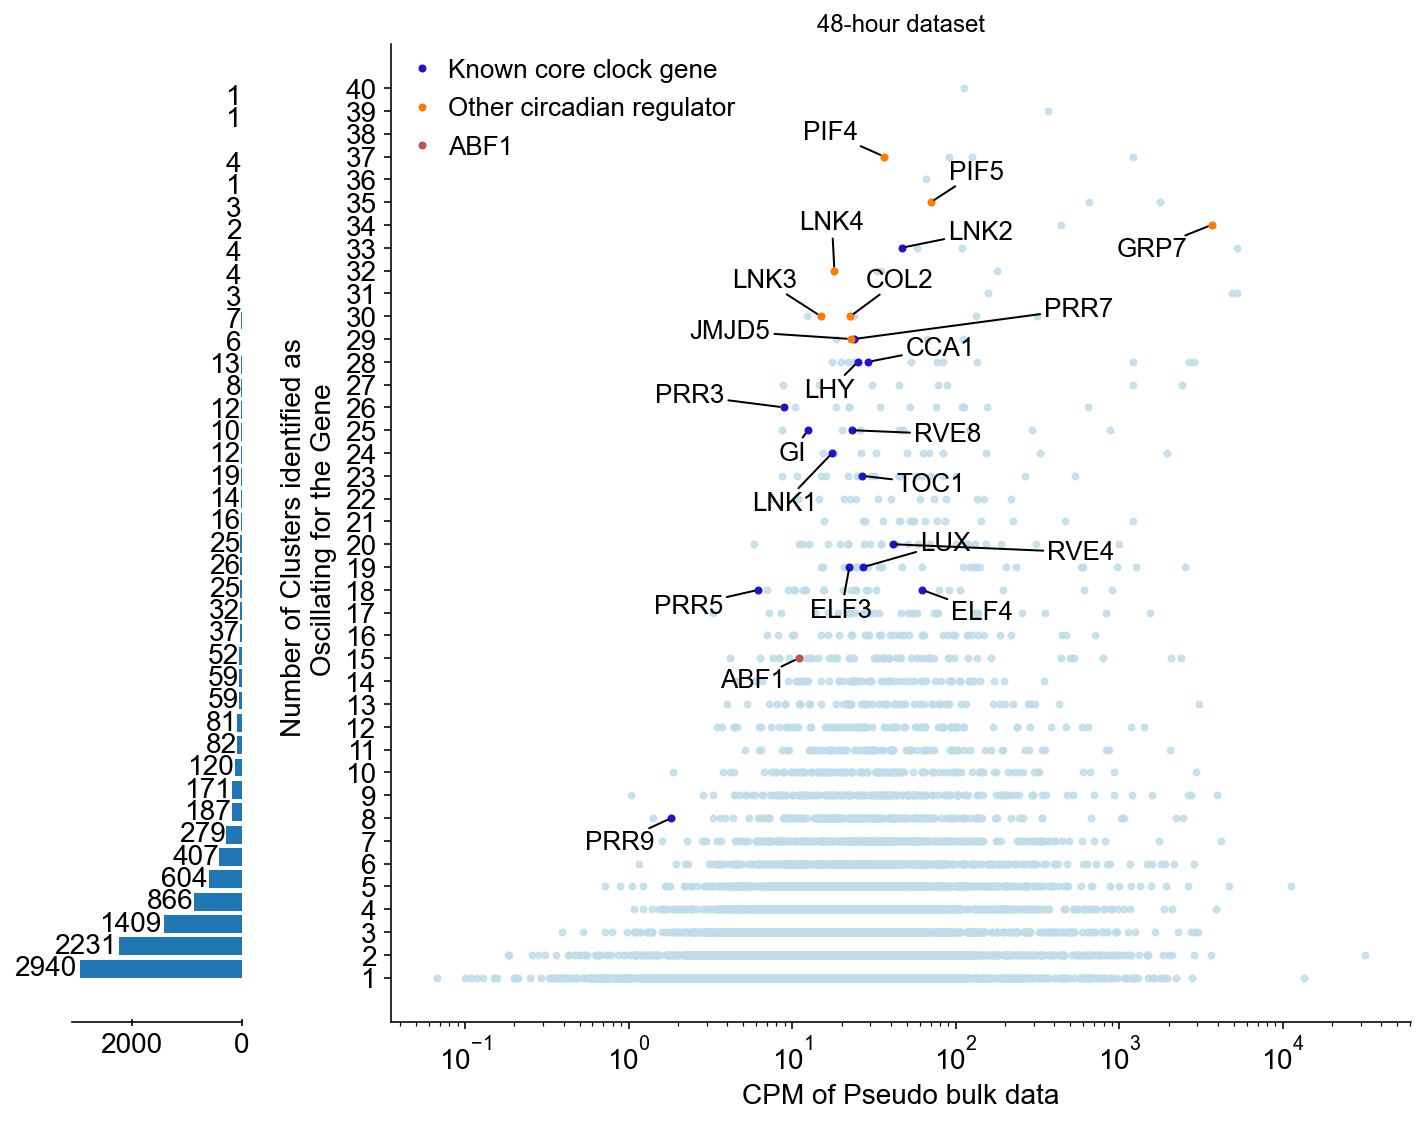

In [ ]:
Plotscatter(df = df_all,savePath='./02_Figures/03_48h_count.pdf')

In [ ]:
df_all.loc[df_all['CycID'] == 'AT1G49720']

,CycID,R0,R1,R2,R3,R4,R5,R6,R7,R8,...,V1,V2,V3,V4,U0,U1,U2,counts,CoreGene,CPM
321,AT1G49720,12,12,12,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,False,10.935581


In [ ]:
df_all

,CycID,R0,R1,R2,R3,R4,R5,R6,R7,R8,...,V1,V2,V3,V4,U0,U1,U2,counts,CoreGene,CPM
0,AT3G62550,10,10,10,10,10,12,10,10,10,...,10,10,12,10,12,12,10,40,False,112.716829
1,AT3G26740,10,10,10,10,10,10,NaN,10,10,...,10,10,10,10,12,10,10,39,False,364.331529
2,AT2G05070,4,4,4,4,4,4,2,4,NaN,...,4,4,4,2,2,4,2,37,False,1202.301355
3,AT2G43010,6,6,6,6,NaN,6,NaN,6,4,...,6,NaN,6,6,4,6,6,37,False,36.369533
4,AT2G42530,10,12,12,12,10,12,NaN,10,NaN,...,12,NaN,10,12,12,12,10,37,False,90.334877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9827,AT1G01040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,12,NaN,NaN,NaN,NaN,1,False,27.139000
9828,AT1G01020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,18,NaN,NaN,NaN,NaN,NaN,1,False,16.039821
9829,AT5G66820,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False,6.914719
9830,AT5G66270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False,2.484863


### TF binding to CCA1 promoter

In [ ]:
df_all48 =  pd.read_table('./03_Analysis/02_CountCPM/48-hour_allGene.txt')
df_all48 

,CycID,R0,R1,R2,R3,R4,R5,R6,R7,R8,...,V3,V4,U0,U1,U2,counts,CoreGene,CPM,regulator,ABF1
0,AT3G62550,10.0,10.0,10.0,10.0,10.0,12.0,10.0,10.0,10.0,...,12.0,10.0,12.0,12.0,10.0,40,False,112.716829,False,False
1,AT3G26740,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.0,10.0,...,10.0,10.0,12.0,10.0,10.0,39,False,364.331529,False,False
2,AT2G05070,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,NaN,...,4.0,2.0,2.0,4.0,2.0,37,False,1202.301355,False,False
3,AT2G43010,6.0,6.0,6.0,6.0,NaN,6.0,NaN,6.0,4.0,...,6.0,6.0,4.0,6.0,6.0,37,False,36.369533,True,False
4,AT2G42530,10.0,12.0,12.0,12.0,10.0,12.0,NaN,10.0,NaN,...,10.0,12.0,12.0,12.0,10.0,37,False,90.334877,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9827,AT1G01040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.0,NaN,NaN,NaN,NaN,1,False,27.139000,False,False
9828,AT1G01020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,False,16.039821,False,False
9829,AT5G66820,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,False,6.914719,False,False
9830,AT5G66270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,False,2.484863,False,False


In [ ]:
df_tf = pd.read_table('/data/Zhaijx/qinyw/data/flsnRNA/illumina_lib/clock_2024_new/03_analysis/cca1_promoter_TFs.txt',header = None)
df_tf

,0
0,AT1G01640
1,AT1G02230
2,AT1G03790
3,AT1G03800
4,AT1G03840
...,...
313,AT5G63470
314,AT5G65410
315,AT5G66270
316,AT5G67190


In [ ]:
df_tf[df_tf[0] == 'AT2G46830']

,0


In [ ]:
df_tf.columns = ['CycID']
df_tf

,CycID
0,AT1G01640
1,AT1G02230
2,AT1G03790
3,AT1G03800
4,AT1G03840
...,...
313,AT5G63470
314,AT5G65410
315,AT5G66270
316,AT5G67190


In [ ]:
df_all['TF'] =df_all['CycID'].apply(lambda x: True if x in df_tf['CycID'].tolist() else False)
df_all

,CycID,R0,R1,R2,R3,R4,R5,R6,R7,R8,...,V4,U0,U1,U2,counts,CoreGene,CPM,regulator,ABF1,TF
0,AT3G62550,10.0,10.0,10.0,10.0,10.0,12.0,10.0,10.0,10.0,...,10.0,12.0,12.0,10.0,40,False,112.716829,False,False,False
1,AT3G26740,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.0,10.0,...,10.0,12.0,10.0,10.0,39,False,364.331529,False,False,False
2,AT2G05070,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,NaN,...,2.0,2.0,4.0,2.0,37,False,1202.301355,False,False,False
3,AT2G43010,6.0,6.0,6.0,6.0,NaN,6.0,NaN,6.0,4.0,...,6.0,4.0,6.0,6.0,37,False,36.369533,True,False,False
4,AT2G42530,10.0,12.0,12.0,12.0,10.0,12.0,NaN,10.0,NaN,...,12.0,12.0,12.0,10.0,37,False,90.334877,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9827,AT1G01040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,27.139000,False,False,False
9828,AT1G01020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,16.039821,False,False,False
9829,AT5G66820,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,6.914719,False,False,False
9830,AT5G66270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,2.484863,False,False,True


In [ ]:
df_all.value_counts('TF')

TF
False    5329
True       77
dtype: int64

In [ ]:
df_all.to_excel('./03_Analysis/02_CountCPM/48-hour_TFgene.xlsx',index = False)

In [ ]:
df_all.to_excel('./03_Analysis/02_CountCPM/24-hour_TFgene.xlsx',index = False)

In [ ]:
df_tf = pd.read_excel('./03_Analysis/02_CountCPM/48-hour_TFgene.xlsx')
df_tf

,CycID
0,AT1G01640
1,AT1G02230
2,AT1G03790
3,AT1G03800
4,AT1G03840
...,...
313,AT5G63470
314,AT5G65410
315,AT5G66270
316,AT5G67190


In [ ]:
df_tf['ABF1'] = df_tf['CycID'].apply(lambda x:True if x == 'AT1G49720' else False)

In [ ]:
df_all

,CycID,R0,R1,R2,R3,R4,R5,R6,R7,R8,...,V4,U0,U1,U2,counts,CoreGene,CPM,regulator,ABF1,TF
0,AT3G62550,10.0,10.0,10.0,10.0,10.0,12.0,10.0,10.0,10.0,...,10.0,12.0,12.0,10.0,40,False,112.716829,False,False,False
1,AT3G26740,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.0,10.0,...,10.0,12.0,10.0,10.0,39,False,364.331529,False,False,False
2,AT2G05070,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,NaN,...,2.0,2.0,4.0,2.0,37,False,1202.301355,False,False,False
3,AT2G43010,6.0,6.0,6.0,6.0,NaN,6.0,NaN,6.0,4.0,...,6.0,4.0,6.0,6.0,37,False,36.369533,True,False,False
4,AT2G42530,10.0,12.0,12.0,12.0,10.0,12.0,NaN,10.0,NaN,...,12.0,12.0,12.0,10.0,37,False,90.334877,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9827,AT1G01040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,27.139000,False,False,False
9828,AT1G01020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,16.039821,False,False,False
9829,AT5G66820,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,6.914719,False,False,False
9830,AT5G66270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,2.484863,False,False,True


In [ ]:
df_tf = df_all.loc[df_all['TF'] == True]
df_tf

,CycID,R0,R1,R2,R3,R4,R5,R6,R7,R8,...,V4,U0,U1,U2,counts,CoreGene,CPM,regulator,ABF1,TF
30,AT2G31380,0.0,0.0,2.0,0.0,NaN,2.0,NaN,0.0,NaN,...,0.0,22.0,0.0,22.0,29,False,18.613755,False,False,True
57,AT5G60100,14.0,14.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,...,12.0,12.0,NaN,NaN,26,True,8.870617,False,False,True
64,AT4G27310,4.0,6.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,2.0,4.0,NaN,NaN,26,False,22.354683,False,False,True
91,AT3G21150,22.0,22.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,...,22.0,NaN,NaN,NaN,23,False,10.719269,False,False,True
246,AT5G67480,10.0,12.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,17,False,22.456477,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9598,AT3G18640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,...,NaN,NaN,NaN,NaN,1,False,10.228477,False,False,True
9603,AT1G07530,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,14.494734,False,False,True
9635,AT5G60910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,0.961589,False,False,True
9701,AT5G63470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,34.940782,False,False,True


In [ ]:
df_tf.to_excel('./03_Analysis/02_CountCPM/48-hour_TFgene.xlsx',index = False)

In [ ]:
dt_Gene

{'AT3G17609': 'HYH',
 'AT3G59060': 'RVE2',
 'AT2G21660': 'GRP7',
 'AT2G46830': 'CCA1',
 'AT1G01060': 'LHY',
 'AT2G46790': 'PRR9',
 'AT5G02810': 'PRR7',
 'AT3G09600': 'RVE8',
 'AT5G52660': 'RVE6',
 'AT5G02840': 'RVE4',
 'AT5G64170': 'LNK1',
 'AT3G54500': 'LNK2',
 'AT5G24470': 'PRR5',
 'AT5G60100': 'PRR3',
 'AT5G61380': 'TOC1',
 'AT1G22770': 'GI',
 'AT3G46640': 'LUX',
 'AT2G40080': 'ELF4',
 'AT2G25930': 'ELF3',
 'AT3G26640': 'LWD2',
 'AT1G49720': 'ABF1'}

In [ ]:
def Plotscatter_tf(df = df_all,savePath =None,figsize= (10,6),bbox_to_anchor = (0.25,1),title = f'24-hour dataset\n'+'Transcription Factors binding to CCA1 promoter'):
    fig, ax = plt.subplots(1,2,figsize = figsize, gridspec_kw={'width_ratios': [1, 6],'wspace':0.25},sharey=False)
    # count plot
    df_count = df.value_counts('counts').reset_index()
    def dataframeTreat(tmp = df_count):
        # 找到counts列的最大值
        max_count = tmp['counts'].max()

        # 获取0到max_count的所有整数
        all_counts = set(range(1, max_count + 1))

        # 获取现有counts中的整数
        existing_counts = set(tmp['counts'])

        # 计算缺少的整数
        missing_counts = all_counts - existing_counts

        # 创建缺少的行并将其添加到原始DataFrame
        new_rows = pd.DataFrame({'counts': list(missing_counts), 0: [0] * len(missing_counts)})

        # 将缺少的行添加到原DataFrame，并按counts列排序
        tmp = pd.concat([tmp, new_rows], ignore_index=True)
        tmp = tmp.sort_values(by='counts').reset_index(drop=True)
        return tmp
    df_count_plot = dataframeTreat(tmp = df_count)
    bars =ax[0].barh(df_count_plot['counts'], df_count_plot[0])
    #ax[0].bar_label(ax[0].containers[0],fmt='%d', padding=3, label_type='edge',)
    ax[0].invert_xaxis()
    # Hide the right and top spines, show only the bottom and left spines
    ax[0].spines['right'].set_visible(False)
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['left'].set_visible(False)
    ax[0].spines['bottom'].set_visible(True)

    # Hide y ticks and labels for ax[0]
    ax[0].tick_params(axis='y', which='both', left=False, labelleft=False)
    ax[0].tick_params(axis='x', direction='inout',labelsize=14)
    #ax[0].set_xticks(range(0,61,30))

    
    # Add text labels to each bar, positioned to the right of the bar
    for bar in bars:
        width = bar.get_width()
        label = f'{width:.0f}'  # Format label with no decimal places
        ax[0].text(width + 0.02 * width,  # x position, add padding to the right
                bar.get_y() + bar.get_height() / 2,  # y position, centered vertically
                label,
                va='center', ha='right', fontsize=13, color='black')
    
       
    ax[1].scatter(df.loc[df['ABF1'] == False]['CPM'],df.loc[df['ABF1'] == False]['counts'],s = 9,color = '#BFDCEA',alpha=0.8,label = 'Other TF')
    ax[1].scatter(df.loc[df['CoreGene'] == True]['CPM'],df.loc[df['CoreGene'] == True]['counts'],s = 9,color = '#1F14C9',label = 'Core clock gene')
    # ax[1].scatter(df.loc[df['regulator'] == True]['CPM'],df.loc[df['regulator'] == True]['counts'],s = 9,color = '#FF7C00',label = 'Other circadian regulator')
    ax[1].scatter(df.loc[df['ABF1'] == True]['CPM'],df.loc[df['ABF1'] == True]['counts'],s = 9,color = '#FF002A',label = 'ABF1')
    ax[1].set_yticks(range(1,df['counts'].max()+1,1))
    ax[1].set_xscale('log')
    # 设置X轴和Y轴刻度标签的字体大小
    ax[1].tick_params(axis='x', labelsize=13)  # 设置X轴刻度标签字体大小为14
    ax[1].tick_params(axis='y', labelsize=13)  # 设置Y轴刻度标签字体大小为14
    # legend
    ax[1].legend(bbox_to_anchor = bbox_to_anchor,fontsize = 13,ncol=1,frameon = False)
    # label
    ax[1].set_xlabel('CPM of Pseudo bulk data',fontsize = 14)
    ax[1].set_ylabel(f'Number of Clusters identified as \n Oscillating for the Gene',fontsize = 14)
    ax[1].set_title(title,fontsize = 14)

    # # 手动设置高亮点的标签
    # highlight_labels = df_clock['symble'].tolist()
    # highlight_points = df.loc[(df['CoreGene'] == True) | (df['regulator'] == True) | (df['ABF1'] == True)]

    
    # Collect annotation texts
    for tp_line in df.loc[(df['ABF1'] == True)| (df['CoreGene'] == True) ].itertuples():
        ax[1].text(
            tp_line.CPM,
            tp_line.counts,
            dt_Gene[tp_line.CycID],
            ha="center",
            va="center",
            fontsize=13,
        )
        
    adjustText.adjust_text(
        ax[1].texts,
        arrowprops=dict(arrowstyle="-", color="black"),
        ax=ax[1],
        min_arrow_len=1,
        expand=(2, 2),
    )
    sns.despine(ax = ax[1])
    plt.tight_layout()
    if savePath:
        plt.savefig(savePath,dpi=300)
    

In [ ]:
dt_Gene = {
 'AT1G49720':'ABF1'
}

48-hour

/tmp/ipykernel_9833/1188941771.py:91: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


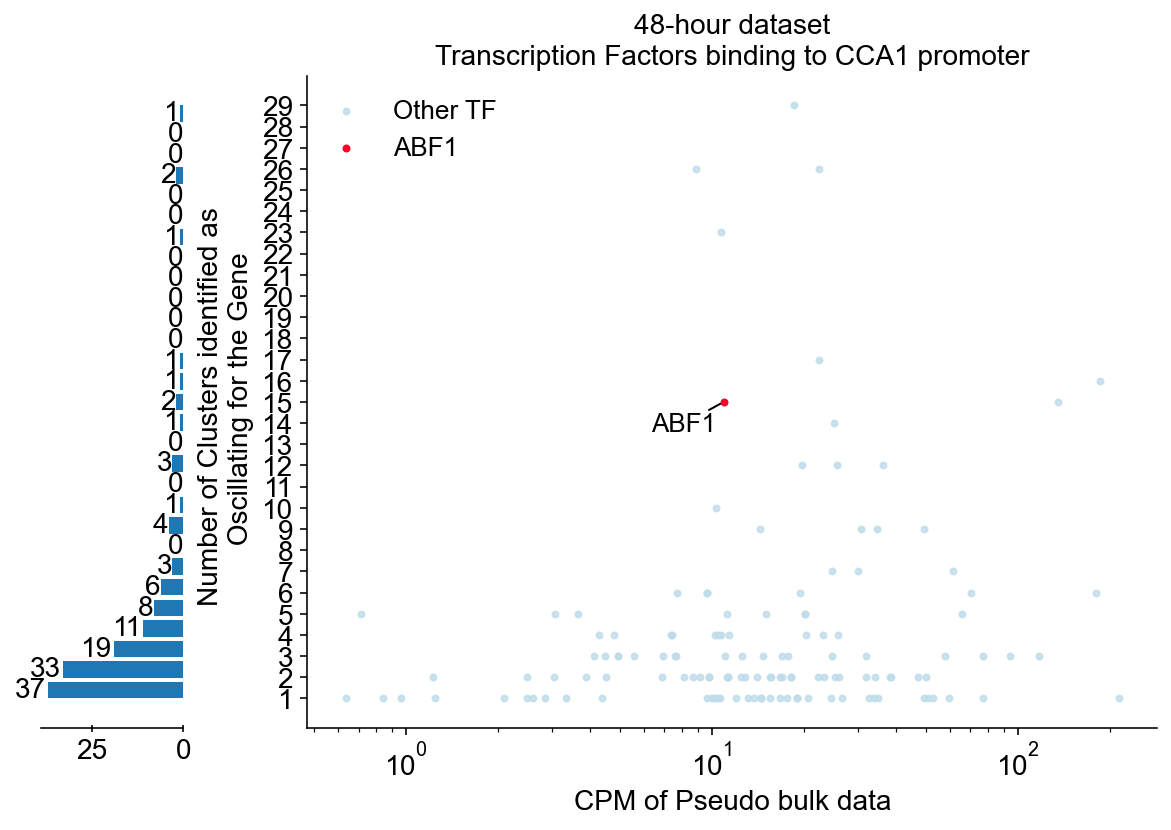

In [ ]:
Plotscatter_tf(df = df_tf,savePath='/data/Zhaijx/qinyw/data/flsnRNA/illumina_lib/clock_revision/20250110/02_Figures/06_48hour-ABF1tf.pdf')

24-hour

In [ ]:
df_tf = pd.read_excel('./03_Analysis/02_CountCPM/24-hour_TFgene.xlsx')
df_tf

,CycID,S0,S3,V1,R4,R3,V0,S9,S11,S7,...,S4,R1,R2,S5,counts,CoreGene,CPM,regulator,ABF1,TF
0,AT1G49720,10.0,12.0,14.0,NaN,10.0,14.0,NaN,NaN,NaN,...,NaN,12.0,NaN,NaN,13,False,50.050610,False,True,True
1,AT5G67480,12.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,10.0,...,NaN,NaN,NaN,12.0,8,False,90.758591,False,False,True
2,AT3G58680,12.0,10.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,12.0,7,False,45.918512,False,False,True
3,AT3G24520,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,18.0,NaN,NaN,7,False,149.334493,False,False,True
4,AT1G45249,18.0,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,...,16.0,NaN,NaN,NaN,7,False,108.853550,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,AT1G21000,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,107.650247,False,False,True
73,AT5G45260,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,59.665686,False,False,True
74,AT5G49330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,47.848338,False,False,True
75,AT5G63470,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,57.066096,False,False,True


/tmp/ipykernel_9833/1707815977.py:91: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


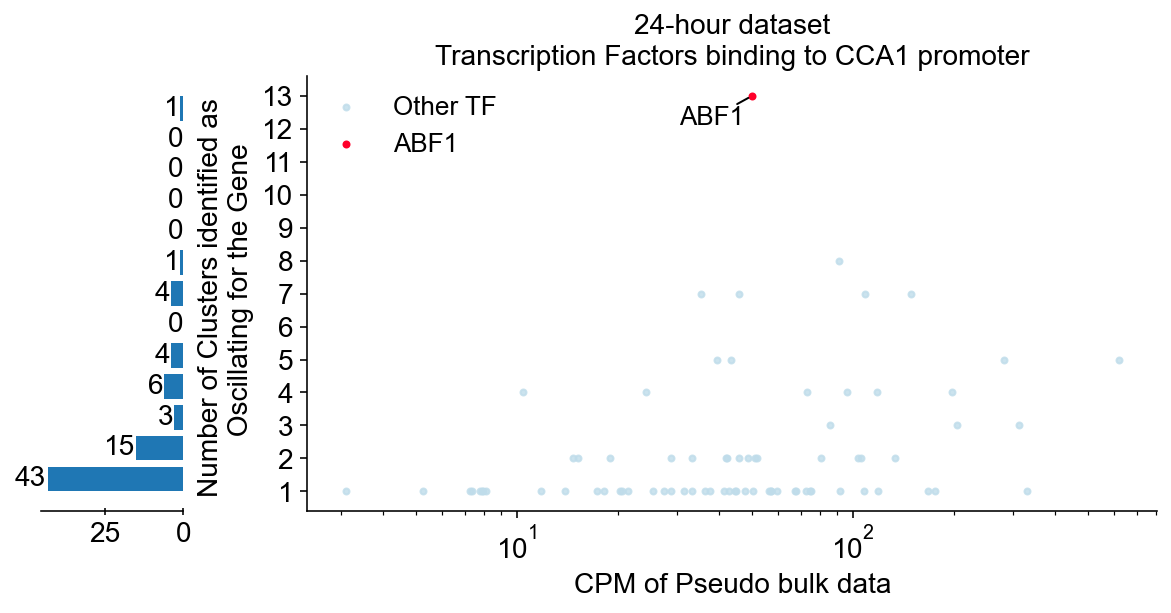

In [ ]:
Plotscatter_tf(df = df_tf,figsize= (10,4),bbox_to_anchor=(0.25,1.01),savePath='/data/Zhaijx/qinyw/data/flsnRNA/illumina_lib/clock_revision/20250110/02_Figures/06_24hour-ABF1tf.pdf')

In [ ]:
df_all = pd.read_excel('./03_Analysis/02_CountCPM/24-hour_TFgene.xlsx')
df_all

,CycID,S0,S3,V1,R4,R3,V0,S9,S11,S7,...,S4,R1,R2,S5,counts,CoreGene,CPM,regulator,ABF1,TF
0,AT1G49720,10.0,12.0,14.0,NaN,10.0,14.0,NaN,NaN,NaN,...,NaN,12.0,NaN,NaN,13,False,50.050610,False,True,True
1,AT5G67480,12.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,10.0,...,NaN,NaN,NaN,12.0,8,False,90.758591,False,False,True
2,AT3G58680,12.0,10.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,12.0,7,False,45.918512,False,False,True
3,AT3G24520,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,18.0,NaN,NaN,7,False,149.334493,False,False,True
4,AT1G45249,18.0,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,...,16.0,NaN,NaN,NaN,7,False,108.853550,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,AT1G21000,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,107.650247,False,False,True
73,AT5G45260,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,59.665686,False,False,True
74,AT5G49330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,47.848338,False,False,True
75,AT5G63470,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,57.066096,False,False,True


In [ ]:
df_tf

,CycID,S0,S3,V1,R4,R3,V0,S9,S11,S7,...,S4,R1,R2,S5,counts,CoreGene,CPM,regulator,ABF1,TF
0,AT1G49720,10.0,12.0,14.0,NaN,10.0,14.0,NaN,NaN,NaN,...,NaN,12.0,NaN,NaN,13,False,50.050610,False,True,True
1,AT5G67480,12.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,10.0,...,NaN,NaN,NaN,12.0,8,False,90.758591,False,False,True
2,AT3G58680,12.0,10.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,12.0,7,False,45.918512,False,False,True
3,AT3G24520,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,18.0,NaN,NaN,7,False,149.334493,False,False,True
4,AT1G45249,18.0,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,...,16.0,NaN,NaN,NaN,7,False,108.853550,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,AT1G21000,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,107.650247,False,False,True
73,AT5G45260,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,59.665686,False,False,True
74,AT5G49330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,47.848338,False,False,True
75,AT5G63470,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,57.066096,False,False,True


### Ath TF list

48-hour

In [ ]:
ath_tf = pd.read_table('/data/Zhaijx/qinyw/data/flsnRNA/illumina_lib/clock_revision/20250110/03_Analysis/06_TF/Ath_TF_list.txt')
ath_tf

,TF_ID,Gene_ID,Family
0,AT3G25730.1,AT3G25730,RAV
1,AT1G68840.1,AT1G68840,RAV
2,AT1G68840.2,AT1G68840,RAV
3,AT1G13260.1,AT1G13260,RAV
4,AT1G25560.1,AT1G25560,RAV
...,...,...,...
2291,AT5G59780.2,AT5G59780,MYB_related
2292,AT5G61420.1,AT5G61420,MYB_related
2293,AT5G61620.1,AT5G61620,MYB_related
2294,AT5G67580.1,AT5G67580,MYB_related


In [ ]:
ath_tf.columns = ['TF_ID','CycID','Family']
ath_tf

,TF_ID,CycID,Family
0,AT3G25730.1,AT3G25730,RAV
1,AT1G68840.1,AT1G68840,RAV
2,AT1G68840.2,AT1G68840,RAV
3,AT1G13260.1,AT1G13260,RAV
4,AT1G25560.1,AT1G25560,RAV
...,...,...,...
2291,AT5G59780.2,AT5G59780,MYB_related
2292,AT5G61420.1,AT5G61420,MYB_related
2293,AT5G61620.1,AT5G61620,MYB_related
2294,AT5G67580.1,AT5G67580,MYB_related


In [ ]:
df_all48['TF'] = df_all48['CycID'].apply(lambda x:True if x in ath_tf.CycID.tolist() else False)
df_all48

,CycID,R0,R1,R2,R3,R4,R5,R6,R7,R8,...,V4,U0,U1,U2,counts,CoreGene,CPM,regulator,ABF1,TF
0,AT3G62550,10.0,10.0,10.0,10.0,10.0,12.0,10.0,10.0,10.0,...,10.0,12.0,12.0,10.0,40,False,112.716829,False,False,False
1,AT3G26740,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.0,10.0,...,10.0,12.0,10.0,10.0,39,False,364.331529,False,False,False
2,AT2G05070,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,NaN,...,2.0,2.0,4.0,2.0,37,False,1202.301355,False,False,False
3,AT2G43010,6.0,6.0,6.0,6.0,NaN,6.0,NaN,6.0,4.0,...,6.0,4.0,6.0,6.0,37,False,36.369533,True,False,True
4,AT2G42530,10.0,12.0,12.0,12.0,10.0,12.0,NaN,10.0,NaN,...,12.0,12.0,12.0,10.0,37,False,90.334877,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9827,AT1G01040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,27.139000,False,False,False
9828,AT1G01020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,16.039821,False,False,False
9829,AT5G66820,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,6.914719,False,False,False
9830,AT5G66270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,2.484863,False,False,False


In [ ]:
df_all48.value_counts('TF')

TF
False    9259
True      573
dtype: int64

In [ ]:
df_48_plot = df_all48.query('TF == True')
df_48_plot

,CycID,R0,R1,R2,R3,R4,R5,R6,R7,R8,...,V4,U0,U1,U2,counts,CoreGene,CPM,regulator,ABF1,TF
3,AT2G43010,6.0,6.0,6.0,6.0,NaN,6.0,NaN,6.0,4.0,...,6.0,4.0,6.0,6.0,37,False,36.369533,True,False,True
9,AT3G59060,4.0,4.0,4.0,4.0,2.0,NaN,NaN,4.0,4.0,...,4.0,0.0,NaN,NaN,35,False,70.395981,True,False,True
29,AT3G02380,0.0,0.0,2.0,0.0,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,22.0,NaN,30,False,22.680060,True,False,True
30,AT2G31380,0.0,0.0,2.0,0.0,NaN,2.0,NaN,0.0,NaN,...,0.0,22.0,0.0,22.0,29,False,18.613755,False,False,True
32,AT5G57660,4.0,6.0,6.0,6.0,NaN,NaN,NaN,6.0,NaN,...,4.0,4.0,6.0,NaN,29,False,24.017923,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9681,AT3G16280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,4.435309,False,False,True
9701,AT5G63470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,34.940782,False,False,True
9770,AT1G02220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,4.515290,False,False,True
9775,AT5G65640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,42.626227,False,False,True


/tmp/ipykernel_9833/1416715554.py:91: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


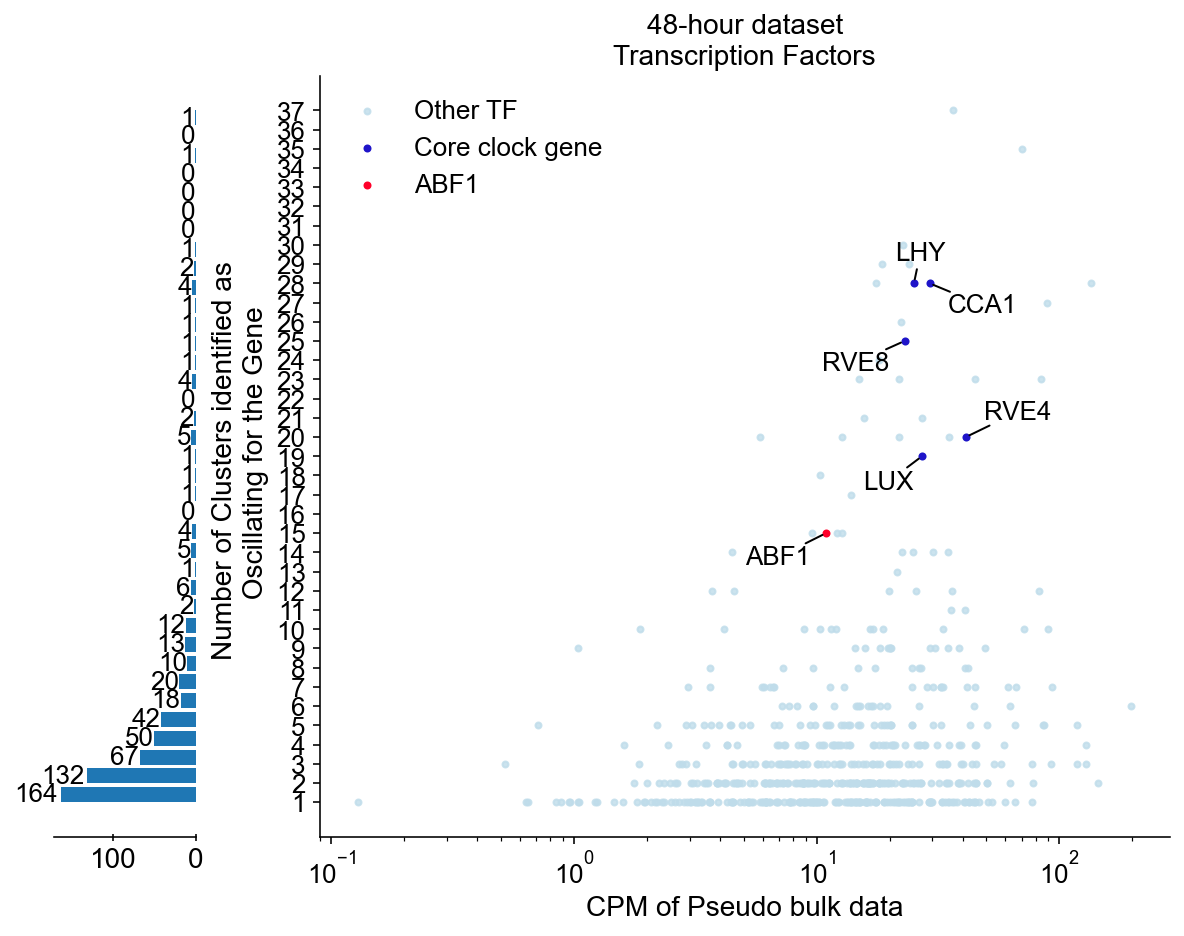

In [ ]:
Plotscatter_tf(
    df = df_48_plot,title = f'48-hour dataset\n'+'Transcription Factors',figsize=(10,7),bbox_to_anchor=(0.36,1),
    savePath ='./03_Analysis/06_TF/48hour_PlantDB_TF.pdf'
    )

24-hour

In [ ]:
Plotscatter_tf(
    df = df_48_plot,title = f'48-hour dataset\n'+'Transcription Factors',figsize=(10,7),bbox_to_anchor=(0.36,1),
    savePath ='./03_Analysis/06_TF/48hour_PlantDB_TF.pdf'
    )

In [ ]:
df_all_24 = pd.read_csv('./03_Analysis/02_CountCPM/24-hour_allGene.txt')
df_all_24

,CycID,S0,S3,V1,R4,R3,V0,S9,S11,S7,...,V3,S4,R1,R2,S5,counts,CoreGene,CPM,regulator,ABF1
0,AT2G21660,NaN,10.0,12.0,10.0,NaN,14.0,10.0,10.0,10.0,...,12.0,10.0,12.0,NaN,10.0,21,False,3009.632080,True,False
1,AT2G46830,0.0,0.0,0.0,0.0,0.0,2.0,NaN,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,20,True,153.182793,False,False
2,AT3G54500,0.0,2.0,2.0,0.0,2.0,NaN,NaN,NaN,0.0,...,2.0,0.0,2.0,2.0,0.0,19,True,405.524597,False,False
3,AT3G09600,22.0,22.0,22.0,22.0,22.0,NaN,NaN,NaN,20.0,...,22.0,22.0,0.0,22.0,NaN,18,True,159.335533,False,False
4,AT5G02810,4.0,6.0,6.0,NaN,6.0,10.0,NaN,NaN,4.0,...,4.0,4.0,8.0,6.0,4.0,18,True,177.861865,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5401,AT5G66050,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,False,72.811208,False,False
5402,AT5G66060,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,False,42.388065,False,False
5403,AT5G66120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,1,False,50.595502,False,False
5404,AT5G66130,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,False,13.327153,False,False


In [ ]:
df_all_24.loc[df_all_24['ABF1'] == True]

,CycID,S0,S3,V1,R4,R3,V0,S9,S11,S7,...,S4,R1,R2,S5,counts,CoreGene,CPM,regulator,ABF1,TF
12,AT1G49720,10.0,12.0,14.0,NaN,10.0,14.0,NaN,NaN,NaN,...,NaN,12.0,NaN,NaN,13,False,50.05061,False,True,True


In [ ]:
(13/5406)*100

0.24047354790972994

In [ ]:
df_all48.loc[df_all48['ABF1'] == True]

,CycID,R0,R1,R2,R3,R4,R5,R6,R7,R8,...,V4,U0,U1,U2,counts,CoreGene,CPM,regulator,ABF1,TF
321,AT1G49720,12.0,12.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,15,False,10.935581,False,True,True


In [ ]:
df_all48

,CycID,R0,R1,R2,R3,R4,R5,R6,R7,R8,...,V4,U0,U1,U2,counts,CoreGene,CPM,regulator,ABF1,TF
0,AT3G62550,10.0,10.0,10.0,10.0,10.0,12.0,10.0,10.0,10.0,...,10.0,12.0,12.0,10.0,40,False,112.716829,False,False,False
1,AT3G26740,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.0,10.0,...,10.0,12.0,10.0,10.0,39,False,364.331529,False,False,False
2,AT2G05070,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,NaN,...,2.0,2.0,4.0,2.0,37,False,1202.301355,False,False,False
3,AT2G43010,6.0,6.0,6.0,6.0,NaN,6.0,NaN,6.0,4.0,...,6.0,4.0,6.0,6.0,37,False,36.369533,True,False,True
4,AT2G42530,10.0,12.0,12.0,12.0,10.0,12.0,NaN,10.0,NaN,...,12.0,12.0,12.0,10.0,37,False,90.334877,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9827,AT1G01040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,27.139000,False,False,False
9828,AT1G01020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,16.039821,False,False,False
9829,AT5G66820,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,6.914719,False,False,False
9830,AT5G66270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,2.484863,False,False,False


In [ ]:
(322/9832)*100

3.2750203417412536

In [ ]:
df_all_24['TF'] = df_all_24['CycID'].apply(lambda x:True if x in ath_tf.CycID.tolist() else False)
df_all_24

,CycID,S0,S3,V1,R4,R3,V0,S9,S11,S7,...,S4,R1,R2,S5,counts,CoreGene,CPM,regulator,ABF1,TF
0,AT2G21660,NaN,10.0,12.0,10.0,NaN,14.0,10.0,10.0,10.0,...,10.0,12.0,NaN,10.0,21,False,3009.632080,True,False,False
1,AT2G46830,0.0,0.0,0.0,0.0,0.0,2.0,NaN,0.0,0.0,...,0.0,0.0,2.0,0.0,20,True,153.182793,False,False,True
2,AT3G54500,0.0,2.0,2.0,0.0,2.0,NaN,NaN,NaN,0.0,...,0.0,2.0,2.0,0.0,19,True,405.524597,False,False,False
3,AT3G09600,22.0,22.0,22.0,22.0,22.0,NaN,NaN,NaN,20.0,...,22.0,0.0,22.0,NaN,18,True,159.335533,False,False,True
4,AT5G02810,4.0,6.0,6.0,NaN,6.0,10.0,NaN,NaN,4.0,...,4.0,8.0,6.0,4.0,18,True,177.861865,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5401,AT5G66050,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,72.811208,False,False,False
5402,AT5G66060,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,42.388065,False,False,False
5403,AT5G66120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,1,False,50.595502,False,False,False
5404,AT5G66130,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,13.327153,False,False,False


In [ ]:
df_all_24.value_counts('TF')

TF
False    5077
True      329
dtype: int64

In [ ]:
df_24_plot = df_all_24.query('TF == True')

/tmp/ipykernel_9833/1416715554.py:91: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


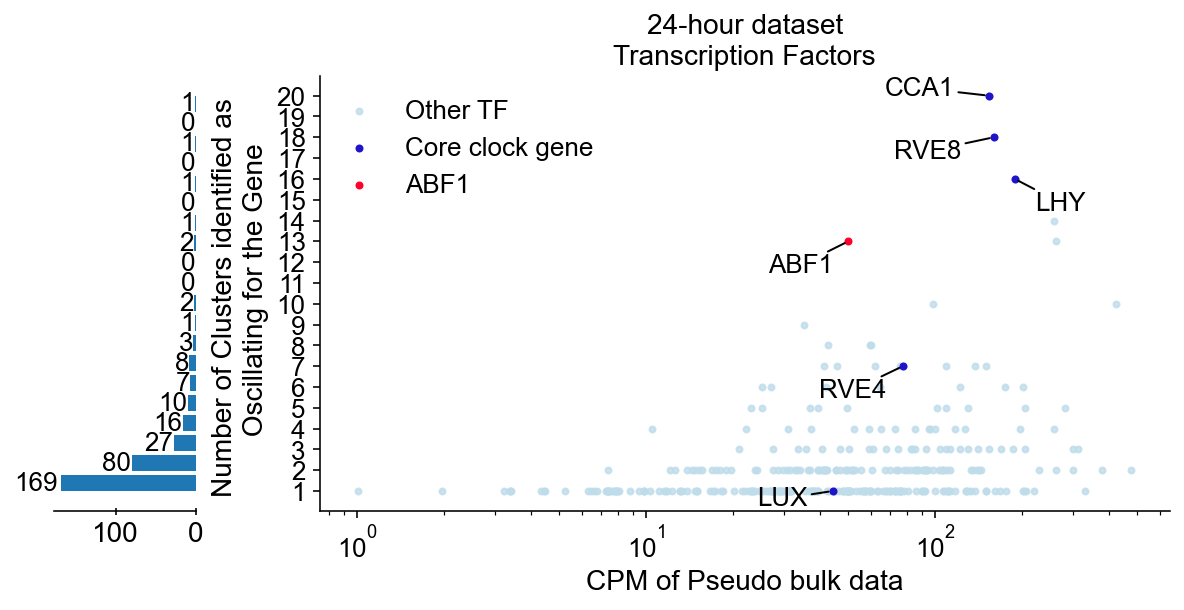

In [ ]:
Plotscatter_tf(
    df = df_24_plot,title = f'24-hour dataset\n'+'Transcription Factors',figsize=(10,4),bbox_to_anchor=(0.35,1),
    savePath ='./03_Analysis/06_TF/24hour_PlantDB_TF.pdf'
    )

In [ ]:
df_24_plot.to_csv('./03_Analysis/06_TF/24-HOUR-plot.txt',sep ='\t',index = False)

In [ ]:
df_24_plot.to_csv('./03_Analysis/06_TF/24-HOUR-plot.csv',index = False)

In [ ]:
df_48_plot.to_csv('./03_Analysis/06_TF/48-HOUR-plot.txt',sep ='\t',index = False)

In [ ]:
df_48_plot.to_csv('./03_Analysis/06_TF/48-HOUR-plot.csv',index = False)

In [ ]:
df_48_plot.reset_index()

,index,CycID,R0,R1,R2,R3,R4,R5,R6,R7,...,V4,U0,U1,U2,counts,CoreGene,CPM,regulator,ABF1,TF
0,3,AT2G43010,6.0,6.0,6.0,6.0,NaN,6.0,NaN,6.0,...,6.0,4.0,6.0,6.0,37,False,36.369533,True,False,True
1,9,AT3G59060,4.0,4.0,4.0,4.0,2.0,NaN,NaN,4.0,...,4.0,0.0,NaN,NaN,35,False,70.395981,True,False,True
2,29,AT3G02380,0.0,0.0,2.0,0.0,NaN,NaN,NaN,0.0,...,0.0,0.0,22.0,NaN,30,False,22.680060,True,False,True
3,30,AT2G31380,0.0,0.0,2.0,0.0,NaN,2.0,NaN,0.0,...,0.0,22.0,0.0,22.0,29,False,18.613755,False,False,True
4,32,AT5G57660,4.0,6.0,6.0,6.0,NaN,NaN,NaN,6.0,...,4.0,4.0,6.0,NaN,29,False,24.017923,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,9681,AT3G16280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,4.435309,False,False,True
569,9701,AT5G63470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,34.940782,False,False,True
570,9770,AT1G02220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,4.515290,False,False,True
571,9775,AT5G65640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,False,42.626227,False,False,True


In [ ]:
df_48_plot.reset_index().loc[df_48_plot.reset_index()['ABF1'] == True]

,index,CycID,R0,R1,R2,R3,R4,R5,R6,R7,...,V4,U0,U1,U2,counts,CoreGene,CPM,regulator,ABF1,TF
29,321,AT1G49720,12.0,12.0,12.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,15,False,10.935581,False,True,True


### All gene

In [ ]:
bdata =   sc.read_h5ad('/data/Zhaijx/qinyw/data/flsnRNA/illumina_lib/circadian/revision/03_h5ad/24hourAnndata.h5ad')
bdata

AnnData object with n_obs × n_vars = 131152 × 24503
    obs: 'ambientRnaFractionEstimatedBySoupx', 'Sample', 'CT', 'n_genes', 'n_counts', 'percent_ct', 'outlier', '__group', 'Batch', 'leiden', 'prev_celltype', 'Cluster', 'celltype', 'leiden_0.05', 'leiden_0.1', 'leiden_0.15', 'leiden_0.2', 'leiden_0.25', 'leiden_0.3', 'leiden_0.35', 'leiden_0.4', 'leiden_0.45', 'leiden_0.5', 'leiden_0.55', 'leiden_0.6', 'leiden_0.65', 'leiden_0.7', 'leiden_0.75', 'leiden_0.8', 'leiden_0.85', 'leiden_0.9', 'leiden_0.95', 'leiden_1.0', 'leiden_1.05', 'leiden_1.1', 'leiden_1.15', 'leiden_1.2', 'leiden_1.25', 'leiden_1.3', 'leiden_1.35', 'leiden_1.4', 'leiden_1.45', 'leiden_1.5', 'leiden_subcluster', 'recluster_ct', 'All', 'leiden_subcluster_t', 'leiden_v1', 'anno'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'Batch_colors', 'CT_colors', 'Cluster_cellexES', 'Cluster_colors', 'EnhancedAnndata_rawLayer', 'Sample_col

In [ ]:
df24=pd.read_excel('/data/Zhaijx/qinyw/data/flsnRNA/illumina_lib/clock_revision/20250110/03_Analysis/01_MarkerCellEXPRESSED/48-hourRhythmicGene.xlsx',sheet_name='24-hour Dataset')
df24

,Supplementary Table 3. Oscillating gene in the 24-hour dataset,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,CycID,S0,S3,V1,R4,R3,V0,S9,S11,S7,...,R0,S2,S6,S8,V3,S4,R1,R2,S5,counts
1,AT2G21660,NaN,10,12,10,NaN,14,10,10,10,...,NaN,10,12,10,12,10,12,NaN,10,21
2,AT2G46830,0,0,0,0,0,2,NaN,0,0,...,0,0,0,0,0,0,0,2,0,20
3,AT3G54500,0,2,2,0,2,NaN,NaN,NaN,0,...,NaN,0,0,2,2,0,2,2,0,19
4,AT3G09600,22,22,22,22,22,NaN,NaN,NaN,20,...,0,22,22,22,22,22,0,22,NaN,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5402,AT5G66050,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5403,AT5G66060,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5404,AT5G66120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1
5405,AT5G66130,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
df24.columns = df24.iloc[0,:]
df24

,CycID,S0,S3,V1,R4,R3,V0,S9,S11,S7,...,R0,S2,S6,S8,V3,S4,R1,R2,S5,counts
0,CycID,S0,S3,V1,R4,R3,V0,S9,S11,S7,...,R0,S2,S6,S8,V3,S4,R1,R2,S5,counts
1,AT2G21660,NaN,10,12,10,NaN,14,10,10,10,...,NaN,10,12,10,12,10,12,NaN,10,21
2,AT2G46830,0,0,0,0,0,2,NaN,0,0,...,0,0,0,0,0,0,0,2,0,20
3,AT3G54500,0,2,2,0,2,NaN,NaN,NaN,0,...,NaN,0,0,2,2,0,2,2,0,19
4,AT3G09600,22,22,22,22,22,NaN,NaN,NaN,20,...,0,22,22,22,22,22,0,22,NaN,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5402,AT5G66050,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5403,AT5G66060,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5404,AT5G66120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1
5405,AT5G66130,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
df24 = df24.iloc[1:,:]

In [ ]:
ls_gene = bdata.var_names.tolist()
df_ad_24 = sc.get.obs_df(bdata,keys =[*ls_gene],layer = 'soupX_corrected')
df_ad_24

,AT1G01010,AT1G01020,AT1G01030,AT1G01040,AT1G03993,AT1G01046,AT1G01050,AT1G03997,AT1G01060,AT1G01070,...,AT5G67550,AT5G67560,AT5G67570,AT5G67580,AT5G67590,AT5G67600,AT5G67610,AT5G67620,AT5G67630,AT5G67640
AAACCCAAGCCAAGCA-1-8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCCAAGCCTGTCG-1-8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
AAACCCAAGCTGCCTG-1-8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCCAAGGCACTCC-1-8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
AAACCCAGTAACACGG-1-8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGAGTTAGAAC-1-6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTTGCAGCAGTTT-1-6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTTGGTAGATCGG-1-6,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTTGGTCTAGGTT-1-6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_cpm = df_ad_24.sum(0).reset_index().copy()
df_cpm

,index,0
0,AT1G01010,1986.0
1,AT1G01020,6864.0
2,AT1G01030,4004.0
3,AT1G01040,21704.0
4,AT1G03993,32.0
...,...,...
24498,AT5G67600,1939.0
24499,AT5G67610,2562.0
24500,AT5G67620,1181.0
24501,AT5G67630,1970.0


In [ ]:
df_cpm.set_index('index',inplace=True)

In [ ]:
df_cpm.sum(axis = 0)

0    88090834.0
dtype: float64

In [ ]:
df_cpm = df_cpm.div(88090834.0,axis = 0)* 10**6
df_cpm

,0
index,
AT1G01010,22.544911
AT1G01020,77.919571
AT1G01030,45.453083
AT1G01040,246.382047
AT1G03993,0.363261
...,...
AT5G67600,22.011371
AT5G67610,29.083616
AT5G67620,13.406616


In [ ]:
df_cpm.reset_index(inplace=True)

In [ ]:
df_cpm.columns = ['CycID','CPM']
df_cpm

,CycID,CPM
0,AT1G01010,22.544911
1,AT1G01020,77.919571
2,AT1G01030,45.453083
3,AT1G01040,246.382047
4,AT1G03993,0.363261
...,...,...
24498,AT5G67600,22.011371
24499,AT5G67610,29.083616
24500,AT5G67620,13.406616
24501,AT5G67630,22.363280


In [ ]:
df24['CoreGene'] = df24['CycID'].apply(lambda x:True if x in dt_clock.values () else False)

In [ ]:
df24

,CycID,S0,S3,V1,R4,R3,V0,S9,S11,S7,...,S2,S6,S8,V3,S4,R1,R2,S5,counts,CoreGene
1,AT2G21660,NaN,10,12,10,NaN,14,10,10,10,...,10,12,10,12,10,12,NaN,10,21,False
2,AT2G46830,0,0,0,0,0,2,NaN,0,0,...,0,0,0,0,0,0,2,0,20,True
3,AT3G54500,0,2,2,0,2,NaN,NaN,NaN,0,...,0,0,2,2,0,2,2,0,19,True
4,AT3G09600,22,22,22,22,22,NaN,NaN,NaN,20,...,22,22,22,22,22,0,22,NaN,18,True
5,AT5G02810,4,6,6,NaN,6,10,NaN,NaN,4,...,4,6,6,4,4,8,6,4,18,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5402,AT5G66050,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False
5403,AT5G66060,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False
5404,AT5G66120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1,False
5405,AT5G66130,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False


In [ ]:
df_all =  df24.merge(df_cpm,on = 'CycID',how = 'inner')
df_all

,CycID,S0,S3,V1,R4,R3,V0,S9,S11,S7,...,S6,S8,V3,S4,R1,R2,S5,counts,CoreGene,CPM
0,AT2G21660,NaN,10,12,10,NaN,14,10,10,10,...,12,10,12,10,12,NaN,10,21,False,3009.632080
1,AT2G46830,0,0,0,0,0,2,NaN,0,0,...,0,0,0,0,0,2,0,20,True,153.182793
2,AT3G54500,0,2,2,0,2,NaN,NaN,NaN,0,...,0,2,2,0,2,2,0,19,True,405.524597
3,AT3G09600,22,22,22,22,22,NaN,NaN,NaN,20,...,22,22,22,22,0,22,NaN,18,True,159.335533
4,AT5G02810,4,6,6,NaN,6,10,NaN,NaN,4,...,6,6,4,4,8,6,4,18,True,177.861865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5401,AT5G66050,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False,72.811208
5402,AT5G66060,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False,42.388065
5403,AT5G66120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2,NaN,1,False,50.595502
5404,AT5G66130,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False,13.327153


In [ ]:
dt_regulator = {
    'AT3G17609':'HYH',
    'AT3G59060':'RVE2',
    'AT2G21660':'GRP7',
}

In [ ]:
df_all['regulator'] = df_all['CycID'].apply(lambda x:True if x in dt_regulator.keys() else False)

In [ ]:
df_all['ABF1'] = df_all['CycID'].apply(lambda x:True if x == 'AT1G49720' else False)

In [ ]:
dt_Gene = {
    'AT3G17609':'HYH',
    'AT3G59060':'RVE2',
    'AT2G21660':'GRP7',
    'AT2G46830': 'CCA1',
 'AT1G01060': 'LHY',
 'AT2G46790': 'PRR9',
 'AT5G02810': 'PRR7',
 'AT3G09600': 'RVE8',
 'AT5G52660': 'RVE6',
 'AT5G02840': 'RVE4',
 'AT5G64170': 'LNK1',
 'AT3G54500': 'LNK2',
 'AT5G24470': 'PRR5',
 'AT5G60100': 'PRR3',
 'AT5G61380': 'TOC1',
 'AT1G22770': 'GI',
 'AT3G46640': 'LUX',
 'AT2G40080': 'ELF4',
 'AT2G25930': 'ELF3',
 'AT3G26640': 'LWD2',
 'AT1G49720':'ABF1'

}

In [ ]:
import adjustText

In [ ]:
tmp = df_all.value_counts('counts').reset_index()
tmp

,counts,0
0,1,3286
1,2,1158
2,3,437
3,4,196
4,5,131
5,6,80
6,7,32
7,8,26
8,9,18
9,10,14


In [ ]:
range(tmp.shape[0]+1)

range(0, 21)

In [ ]:
ls = [0 for x in range(tmp.shape[0]+1) if x not in tmp['counts']]
ls

[0]

In [ ]:
# 找到counts列的最大值
max_count = tmp['counts'].max()

# 获取0到max_count的所有整数
all_counts = set(range(1, max_count + 1))

# 获取现有counts中的整数
existing_counts = set(tmp['counts'])

# 计算缺少的整数
missing_counts = all_counts - existing_counts

# 创建缺少的行并将其添加到原始DataFrame
new_rows = pd.DataFrame({'counts': list(missing_counts), 0: [0] * len(missing_counts)})

# 将缺少的行添加到原DataFrame，并按counts列排序
tmp = pd.concat([tmp, new_rows], ignore_index=True)
tmp = tmp.sort_values(by='counts').reset_index(drop=True)
tmp

,counts,0
0,1,3286
1,2,1158
2,3,437
3,4,196
4,5,131
5,6,80
6,7,32
7,8,26
8,9,18
9,10,14


plot function

In [ ]:
def Plotscatter(df = df_all,savePath =None,bbox_to_anchor = (0.42,1),figsize = (10,8)):
    fig, ax = plt.subplots(1,2,figsize = figsize, gridspec_kw={'width_ratios': [1, 6],'wspace':0.25},sharey=False)
    # count plot
    df_count = df.value_counts('counts').reset_index()
    def dataframeTreat(tmp = df_count):
        # 找到counts列的最大值
        max_count = tmp['counts'].max()

        # 获取0到max_count的所有整数
        all_counts = set(range(1, max_count + 1))

        # 获取现有counts中的整数
        existing_counts = set(tmp['counts'])

        # 计算缺少的整数
        missing_counts = all_counts - existing_counts

        # 创建缺少的行并将其添加到原始DataFrame
        new_rows = pd.DataFrame({'counts': list(missing_counts), 0: [0] * len(missing_counts)})

        # 将缺少的行添加到原DataFrame，并按counts列排序
        tmp = pd.concat([tmp, new_rows], ignore_index=True)
        tmp = tmp.sort_values(by='counts').reset_index(drop=True)
        return tmp
    df_count_plot = dataframeTreat(tmp = df_count)
    bars =ax[0].barh(df_count_plot['counts'], df_count_plot[0])
    #ax[0].bar_label(ax[0].containers[0],fmt='%d', padding=3, label_type='edge',)
    ax[0].invert_xaxis()
    # Hide the right and top spines, show only the bottom and left spines
    ax[0].spines['right'].set_visible(False)
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['left'].set_visible(False)
    ax[0].spines['bottom'].set_visible(True)

    # Hide y ticks and labels for ax[0]
    ax[0].tick_params(axis='y', which='both', left=False, labelleft=False)
    ax[0].tick_params(axis='x', direction='inout',labelsize=14)
    #ax[0].set_xticks(range(0,61,30))

    
    # Add text labels to each bar, positioned to the right of the bar
    for bar in bars:
        width = bar.get_width()
        label = f'{width:.0f}'  # Format label with no decimal places
        ax[0].text(width + 0.02 * width,  # x position, add padding to the right
                bar.get_y() + bar.get_height() / 2,  # y position, centered vertically
                label,
                va='center', ha='right', fontsize=14, color='black')
    
       
    ax[1].scatter(df.loc[df['CoreGene'] == False]['CPM'],df.loc[df['CoreGene'] == False]['counts'],s = 9,color = '#BFDCEA',alpha=0.8,label = '')
    ax[1].scatter(df.loc[df['CoreGene'] == True]['CPM'],df.loc[df['CoreGene'] == True]['counts'],s = 9,color = '#1F14C9',label = 'Known core clock gene')
    ax[1].scatter(df.loc[df['regulator'] == True]['CPM'],df.loc[df['regulator'] == True]['counts'],s = 9,color = '#FF7C00',label = 'Other circadian regulator')
    ax[1].scatter(df.loc[df['ABF1'] == True]['CPM'],df.loc[df['ABF1'] == True]['counts'],s = 9,color = '#FF002A',label = 'ABF1')
    ax[1].set_yticks(range(1,41,1))
    ax[1].set_xscale('log')
    # 设置X轴和Y轴刻度标签的字体大小
    ax[1].tick_params(axis='x', labelsize=14)  # 设置X轴刻度标签字体大小为14
    ax[1].tick_params(axis='y', labelsize=14)  # 设置Y轴刻度标签字体大小为14
    # legend
    ax[1].legend(bbox_to_anchor = bbox_to_anchor,fontsize = 13,ncol=1,frameon  = False)
    # label
    ax[1].set_xlabel('CPM of Pseudo bulk data',fontsize = 14)
    ax[1].set_ylabel(f'Number of Clusters identified as \n Oscillating for the Gene',fontsize = 14)
    ax[1].set_title('48-hour dataset',fontsize = 14)

    # # 手动设置高亮点的标签
    # highlight_labels = df_clock['symble'].tolist()
    # highlight_points = df.loc[(df['CoreGene'] == True) | (df['regulator'] == True) | (df['ABF1'] == True)]

    
    # Collect annotation texts
    for tp_line in df.loc[(df['CoreGene'] == True) | (df['regulator'] == True) | (df['ABF1'] == True)].itertuples():
        ax[1].text(
            tp_line.CPM,
            tp_line.counts,
            dt_Gene[tp_line.CycID],
            ha="center",
            va="center",
            fontsize=13,
        )
        
    adjustText.adjust_text(
        ax[1].texts,
        arrowprops=dict(arrowstyle="-", color="black"),
        ax=ax[1],
        min_arrow_len=.5,
        expand=(2, 2),
    )
    sns.despine(ax = ax[1])
    plt.tight_layout()
    if savePath:
        plt.savefig(savePath,dpi=300)
    

In [ ]:
df_all = pd.read_table('./03_Analysis/02_CountCPM/24-hour_allGene.txt',sep =',')
df_all

,CycID,S0,S3,V1,R4,R3,V0,S9,S11,S7,...,V3,S4,R1,R2,S5,counts,CoreGene,CPM,regulator,ABF1
0,AT2G21660,NaN,10.0,12.0,10.0,NaN,14.0,10.0,10.0,10.0,...,12.0,10.0,12.0,NaN,10.0,21,False,3009.632080,True,False
1,AT2G46830,0.0,0.0,0.0,0.0,0.0,2.0,NaN,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,20,True,153.182793,False,False
2,AT3G54500,0.0,2.0,2.0,0.0,2.0,NaN,NaN,NaN,0.0,...,2.0,0.0,2.0,2.0,0.0,19,True,405.524597,False,False
3,AT3G09600,22.0,22.0,22.0,22.0,22.0,NaN,NaN,NaN,20.0,...,22.0,22.0,0.0,22.0,NaN,18,True,159.335533,False,False
4,AT5G02810,4.0,6.0,6.0,NaN,6.0,10.0,NaN,NaN,4.0,...,4.0,4.0,8.0,6.0,4.0,18,True,177.861865,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5401,AT5G66050,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,False,72.811208,False,False
5402,AT5G66060,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,False,42.388065,False,False
5403,AT5G66120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,1,False,50.595502,False,False
5404,AT5G66130,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,False,13.327153,False,False


In [ ]:
df_all[df_all.regulator == True].CycID

9     AT3G59060
10    AT2G21660
54    AT3G17609
Name: CycID, dtype: object

In [ ]:
dt_Gene

{'AT2G43010': 'PIF4',
 'AT3G59060': 'PIF5',
 'AT3G12320': 'LNK3',
 'AT5G06980': 'LNK4',
 'AT3G02380': 'COL2',
 'AT2G21660': 'GRP7',
 'AT3G20810': 'JMJD5',
 'AT2G46830': 'CCA1',
 'AT1G01060': 'LHY',
 'AT2G46790': 'PRR9',
 'AT5G02810': 'PRR7',
 'AT3G09600': 'RVE8',
 'AT5G52660': 'RVE6',
 'AT5G02840': 'RVE4',
 'AT5G64170': 'LNK1',
 'AT3G54500': 'LNK2',
 'AT5G24470': 'PRR5',
 'AT5G60100': 'PRR3',
 'AT5G61380': 'TOC1',
 'AT1G22770': 'GI',
 'AT3G46640': 'LUX',
 'AT2G40080': 'ELF4',
 'AT2G25930': 'ELF3',
 'AT3G26640': 'LWD2',
 'AT1G49720': 'ABF1'}

/tmp/ipykernel_9833/2203263773.py:91: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


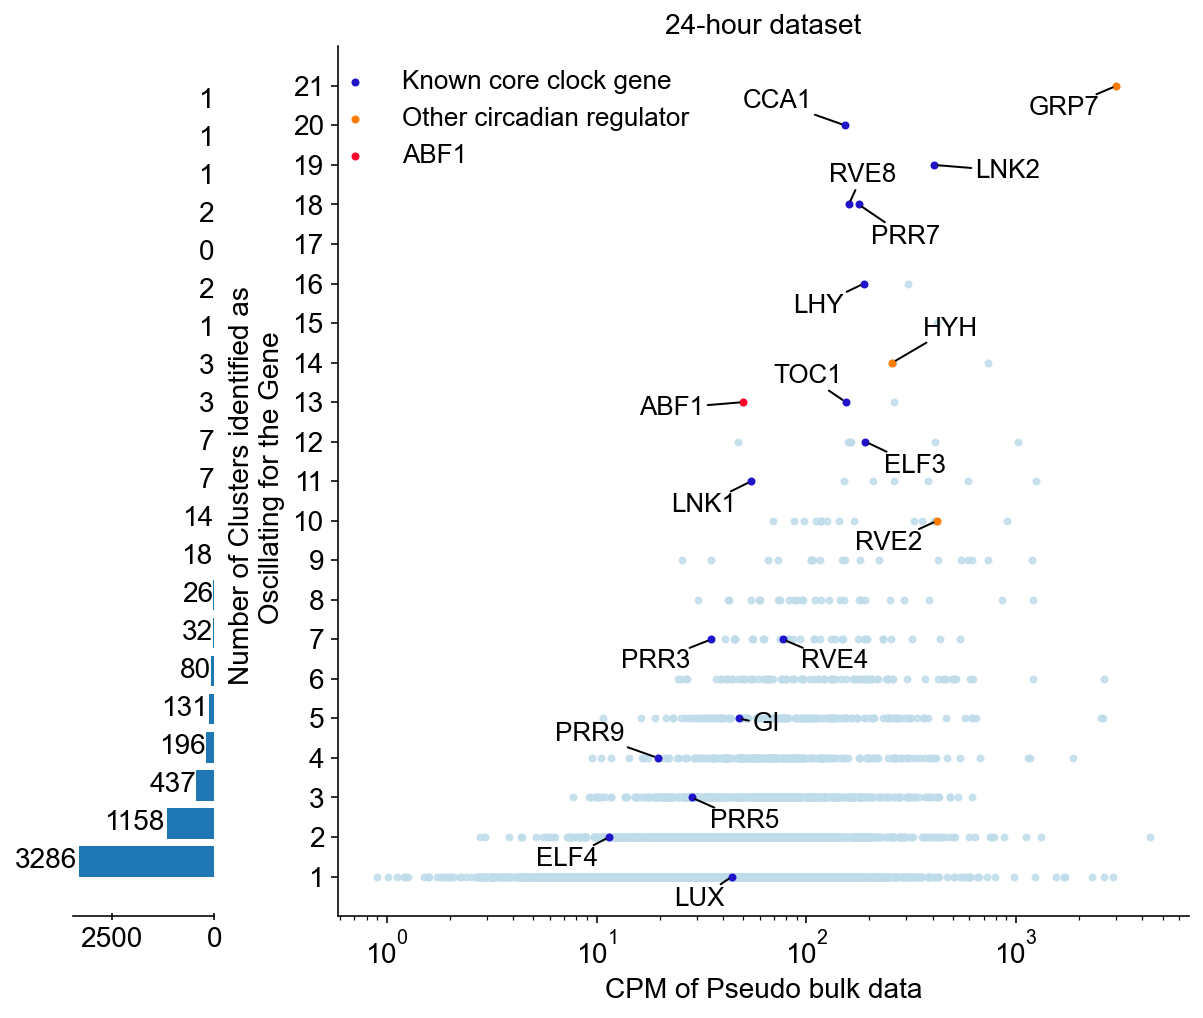

In [ ]:
Plotscatter(df = df_all,
            bbox_to_anchor = (0.44,1),
            savePath='./02_Figures/03_24h_count_newColor.pdf'
            )

In [ ]:
dt_regulator = {
    'AT2G43010':'PIF4',
    'AT3G59060':'PIF5',
    'AT3G12320':'LNK3',
    'AT5G06980':'LNK4',
    'AT3G02380':'COL2',
    'AT2G21660':'GRP7',
    'AT3G20810':'JMJD5',
}

In [ ]:
df_all = pd.read_table('./03_Analysis/02_CountCPM/48-hour_allGene.txt')
df_all

,CycID,R0,R1,R2,R3,R4,R5,R6,R7,R8,...,V3,V4,U0,U1,U2,counts,CoreGene,CPM,regulator,ABF1
0,AT3G62550,10.0,10.0,10.0,10.0,10.0,12.0,10.0,10.0,10.0,...,12.0,10.0,12.0,12.0,10.0,40,False,112.716829,False,False
1,AT3G26740,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.0,10.0,...,10.0,10.0,12.0,10.0,10.0,39,False,364.331529,False,False
2,AT2G05070,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,NaN,...,4.0,2.0,2.0,4.0,2.0,37,False,1202.301355,False,False
3,AT2G43010,6.0,6.0,6.0,6.0,NaN,6.0,NaN,6.0,4.0,...,6.0,6.0,4.0,6.0,6.0,37,False,36.369533,True,False
4,AT2G42530,10.0,12.0,12.0,12.0,10.0,12.0,NaN,10.0,NaN,...,10.0,12.0,12.0,12.0,10.0,37,False,90.334877,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9827,AT1G01040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.0,NaN,NaN,NaN,NaN,1,False,27.139000,False,False
9828,AT1G01020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,False,16.039821,False,False
9829,AT5G66820,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,False,6.914719,False,False
9830,AT5G66270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,False,2.484863,False,False


In [ ]:
df_all[df_all.CycID == 'AT3G17609']

,CycID,R0,R1,R2,R3,R4,R5,R6,R7,R8,...,V3,V4,U0,U1,U2,counts,CoreGene,CPM,regulator,ABF1
54,AT3G17609,0.0,0.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,...,22.0,22.0,22.0,NaN,22.0,27,False,88.671637,True,False


In [ ]:
df_all.loc[df_all['CycID'] == 'AT2G43010']

,CycID,R0,R1,R2,R3,R4,R5,R6,R7,R8,...,V3,V4,U0,U1,U2,counts,CoreGene,CPM,regulator,ABF1
3,AT2G43010,6.0,6.0,6.0,6.0,NaN,6.0,NaN,6.0,4.0,...,6.0,6.0,4.0,6.0,6.0,37,False,36.369533,True,False


/tmp/ipykernel_9833/217220685.py:91: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


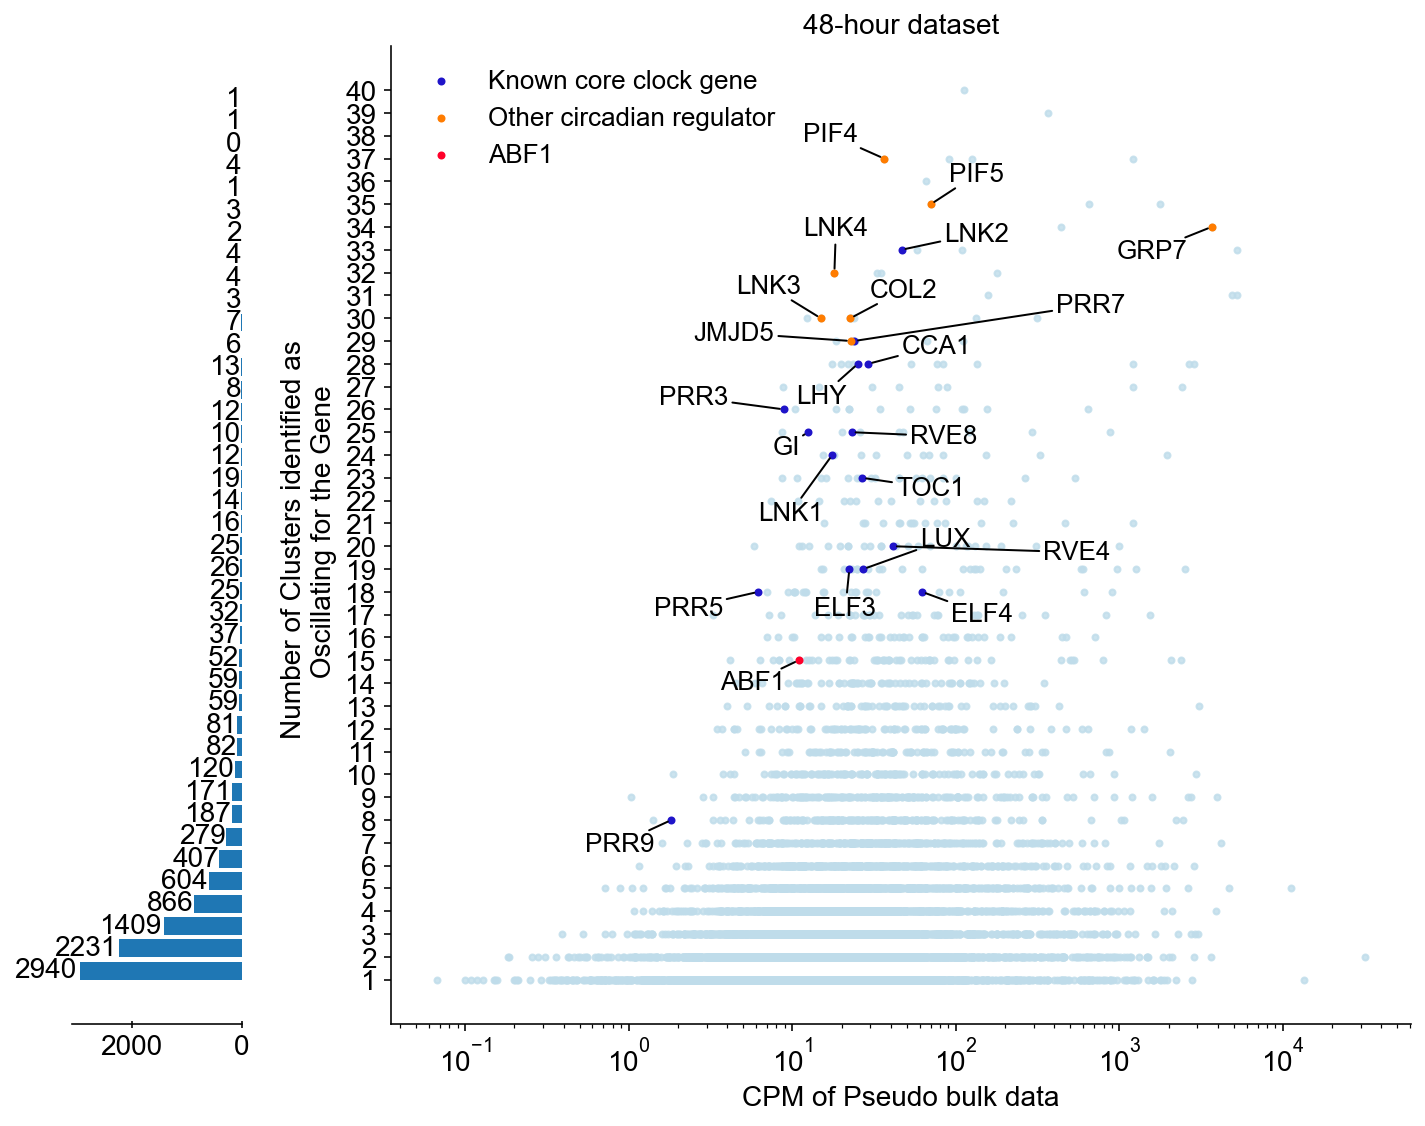

In [ ]:
Plotscatter(df = df_all,
            bbox_to_anchor = (0.4,1),
            figsize = (12,9),
            savePath='./02_Figures/03_48h_count_newColor.pdf'
            )